In [1]:
# increase image quality
%config InlineBackend.figure_format = 'retina'


In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning, module='.*messagestream.*')
warnings.filterwarnings('ignore', category=UserWarning, module='keras.engine.training')


# Standard libraries
import os
import pickle
import importlib.machinery
from tqdm import tqdm

# Data handling and numerical operations
import numpy as np
import pandas as pd

# Machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from scipy import stats  # This is the required import
import joblib
from tensorflow.keras.models import save_model, load_model
from lifelines import KaplanMeierFitter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import binom
from matplotlib_venn import venn3, venn2
from scipy.stats import mannwhitneyu

# Network Analysis
import networkx as nx

# Survival Analysis
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Visualization
import matplotlib.pyplot as plt

# Set logging level for TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = info, 2 = warnings & errors, 3 = errors only

# Import your custom functions
functions = importlib.machinery.SourceFileLoader('module_name', './custom_functions.py').load_module()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


data shape: (1363, 15133)
Data split into 22 chunks in the folder './data/GSE96058'.
data shape: (1363, 15133)
x_train shape: (1090, 15132)    y_train shape: (1090,)
x_test shape : (273, 15132)    y_test shape: (273,)


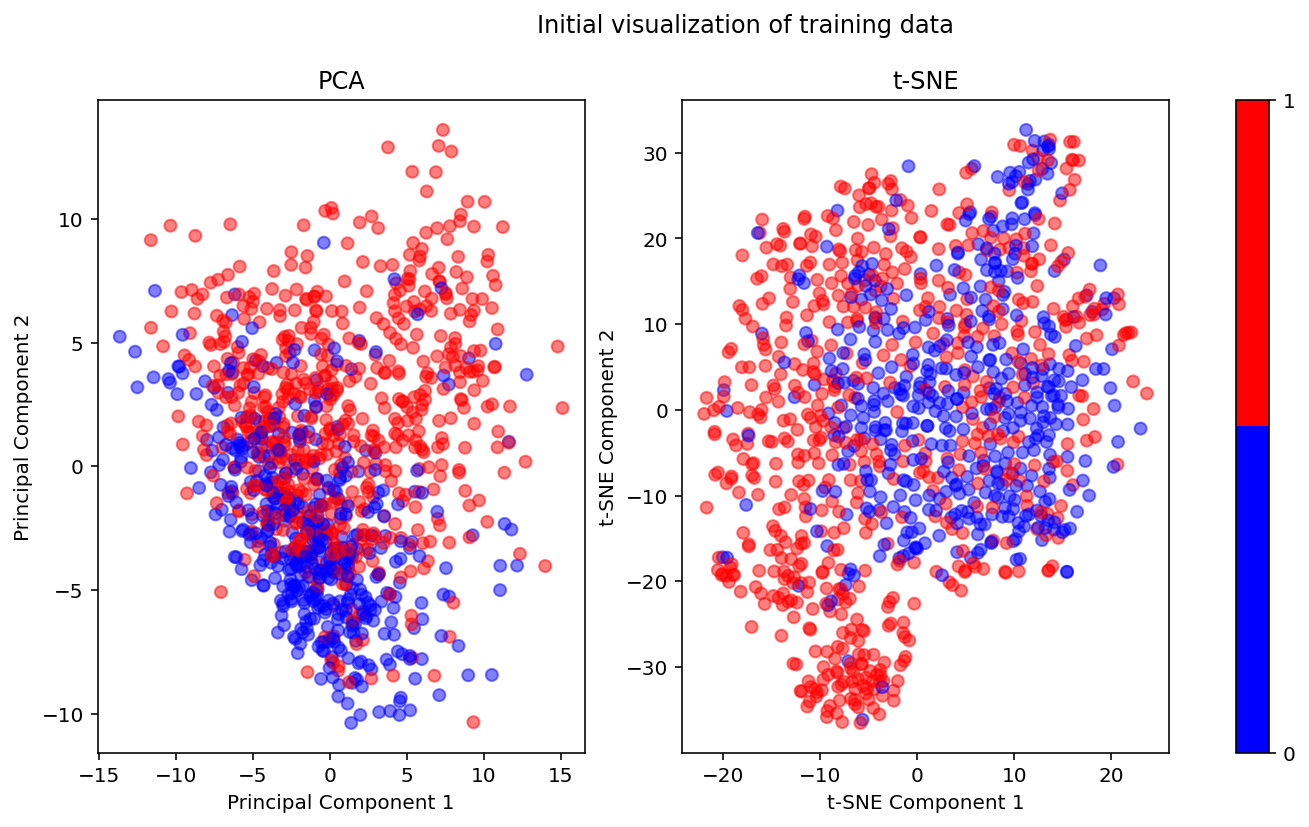

In [3]:
# load and split original data (split so uploadable to Github)
# GSE96058 = functions.data_load('./data/GSE96058.csv')
# functions.split_csv('./data/GSE96058.csv', './data/GSE96058')

# merge and load data train test split
GSE96058 = functions.merge_load_csv('./data/GSE96058')
x_train, x_test, y_train, y_test = functions.train_test_splitting(GSE96058)
functions.visualize_training_data(x_train, y_train)

--- kernel pca ---


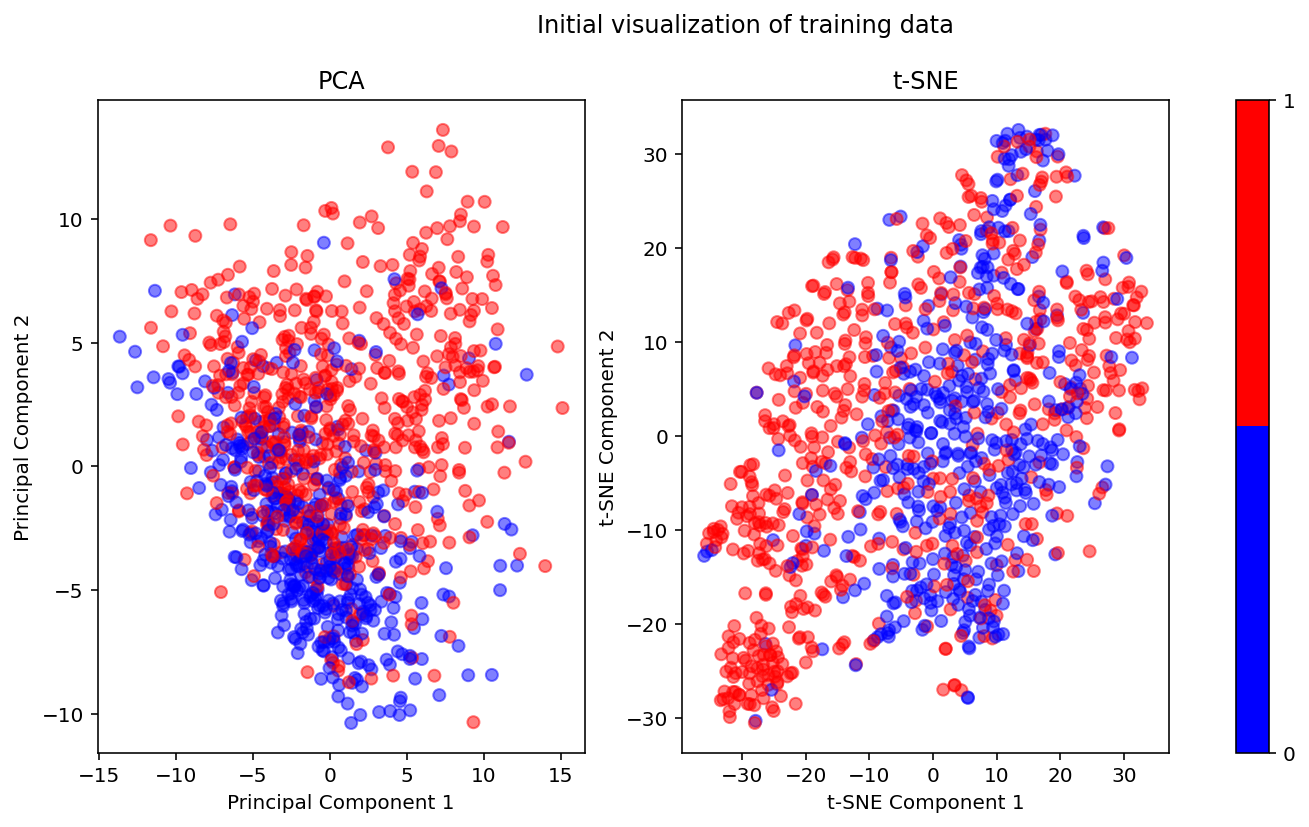

In [4]:
# drop into same dimensionality reduction
k = 100
# 'PCA', 'FA', 'LDA', 'SVD', 'KernelPCA', 'SparsePCA', 'Isomap', 'ICA', 'NMF'
print("--- kernel pca ---")
x_train_reduced, x_test_reduced, kernelpca_reducer = functions.apply_dimensionality_reduction(x_train, x_test, 'KernelPCA', k)
functions.visualize_training_data(x_train_reduced, y_train)


In [5]:
# # Generate Surgate Importances
# mlp_surgate_importances = functions.surrogate_model_importance(x_test, kernelpca_reducer, './results/models/mlp_model.h5')
# cnn_surgate_importances = functions.surrogate_model_importance(x_test, kernelpca_reducer, './results/models/cnn_model.h5')
# log_surgate_importances = functions.surrogate_model_importance(x_test, kernelpca_reducer, './results/models/log_model.h5')

# # Save Surgate Importances
# functions.save_dataframe_to_txt(mlp_surgate_importances, './results/feature_importance/comparison/mlp_surgate_importances.txt')
# functions.save_dataframe_to_txt(cnn_surgate_importances, './results/feature_importance/comparison/cnn_surgate_importances.txt')
# functions.save_dataframe_to_txt(log_surgate_importances, './results/feature_importance/comparison/log_surgate_importances.txt')

# Load Surgate Importances
mlp_surgate_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/mlp_surgate_importances.txt')
cnn_surgate_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/cnn_surgate_importances.txt')
log_surgate_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/log_surgate_importances.txt')



In [6]:
# Generate SHAP Importances
# mlp_shap_importances = functions.surrogate_shap_importance(x_test, kernelpca_reducer, './results/models/mlp_model.h5')
# cnn_shap_importances = functions.surrogate_shap_importance(x_test, kernelpca_reducer, './results/models/cnn_model.h5')
# log_shap_importances = functions.surrogate_shap_importance(x_test, kernelpca_reducer, './results/models/log_model.h5')

# functions.save_dataframe_to_txt(mlp_shap_importances, './results/feature_importance/comparison/mlp_shap_importances.txt')
# functions.save_dataframe_to_txt(cnn_shap_importances, './results/feature_importance/comparison/cnn_shap_importances.txt')
# functions.save_dataframe_to_txt(log_shap_importances, './results/feature_importance/comparison/log_shap_importances.txt')

mlp_shap_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/mlp_shap_importances.txt')
cnn_shap_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/cnn_shap_importances.txt')
log_shap_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/log_shap_importances.txt')




In [7]:
# mlp_shapinv_importances = functions.inverse_mapping_shap(x_test, kernelpca_reducer, './results/models/mlp_model.h5')
# cnn_shapinv_importances = functions.inverse_mapping_shap(x_test, kernelpca_reducer, './results/models/cnn_model.h5')
# log_shapinv_importances = functions.inverse_mapping_shap(x_test, kernelpca_reducer, './results/models/log_model.h5')

# functions.save_dataframe_to_txt(mlp_shapinv_importances, './results/feature_importance/comparison/mlp_shapinv_importances.txt')
# functions.save_dataframe_to_txt(cnn_shapinv_importances, './results/feature_importance/comparison/cnn_shapinv_importances.txt')
# functions.save_dataframe_to_txt(log_shapinv_importances, './results/feature_importance/comparison/log_shapinv_importances.txt')

mlp_shapinv_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/mlp_shapinv_importances.txt')
cnn_shapinv_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/cnn_shapinv_importances.txt')
log_shapinv_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/log_shapinv_importances.txt')


In [8]:
# mlp_lime_importances = functions.lime_importance(x_test,x_train,y_train, kernelpca_reducer, './results/models/mlp_model.h5', False)
# cnn_lime_importances = functions.lime_importance(x_test,x_train,y_train, kernelpca_reducer, './results/models/cnn_model.h5', False)
# log_lime_importances = functions.lime_importance(x_test,x_train,y_train, kernelpca_reducer, './results/models/log_model.h5', False)

# functions.save_dataframe_to_txt(mlp_lime_importances, './results/feature_importance/comparison/mlp_lime_importances.txt')
# functions.save_dataframe_to_txt(cnn_lime_importances, './results/feature_importance/comparison/cnn_lime_importances.txt')
# functions.save_dataframe_to_txt(log_lime_importances, './results/feature_importance/comparison/log_lime_importances.txt')

mlp_lime_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/mlp_lime_importances.txt')
cnn_lime_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/cnn_lime_importances.txt')
log_lime_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/log_lime_importances.txt')



In [9]:
# mlp_ale_importances = functions.ale_feature_importance(x_test, kernelpca_reducer, './results/models/mlp_model.h5')
# cnn_ale_importances = functions.ale_feature_importance(x_test, kernelpca_reducer, './results/models/cnn_model.h5')
# log_ale_importances = functions.ale_feature_importance(x_test, kernelpca_reducer, './results/models/log_model.h5')

# functions.save_dataframe_to_txt(mlp_ale_importances, './results/feature_importance/comparison/mlp_ale_importances.txt')
# functions.save_dataframe_to_txt(cnn_ale_importances, './results/feature_importance/comparison/cnn_ale_importances.txt')
# functions.save_dataframe_to_txt(log_ale_importances, './results/feature_importance/comparison/log_ale_importances.txt')

mlp_ale_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/mlp_ale_importances.txt')
cnn_ale_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/cnn_ale_importances.txt')
log_ale_importances = functions.load_dataframe_from_txt('./results/feature_importance/comparison/log_ale_importances.txt')



set()
Expected total overlap (any two of three groups): 1.98
Probability of observing at least 36 overlaps: 0.0000000


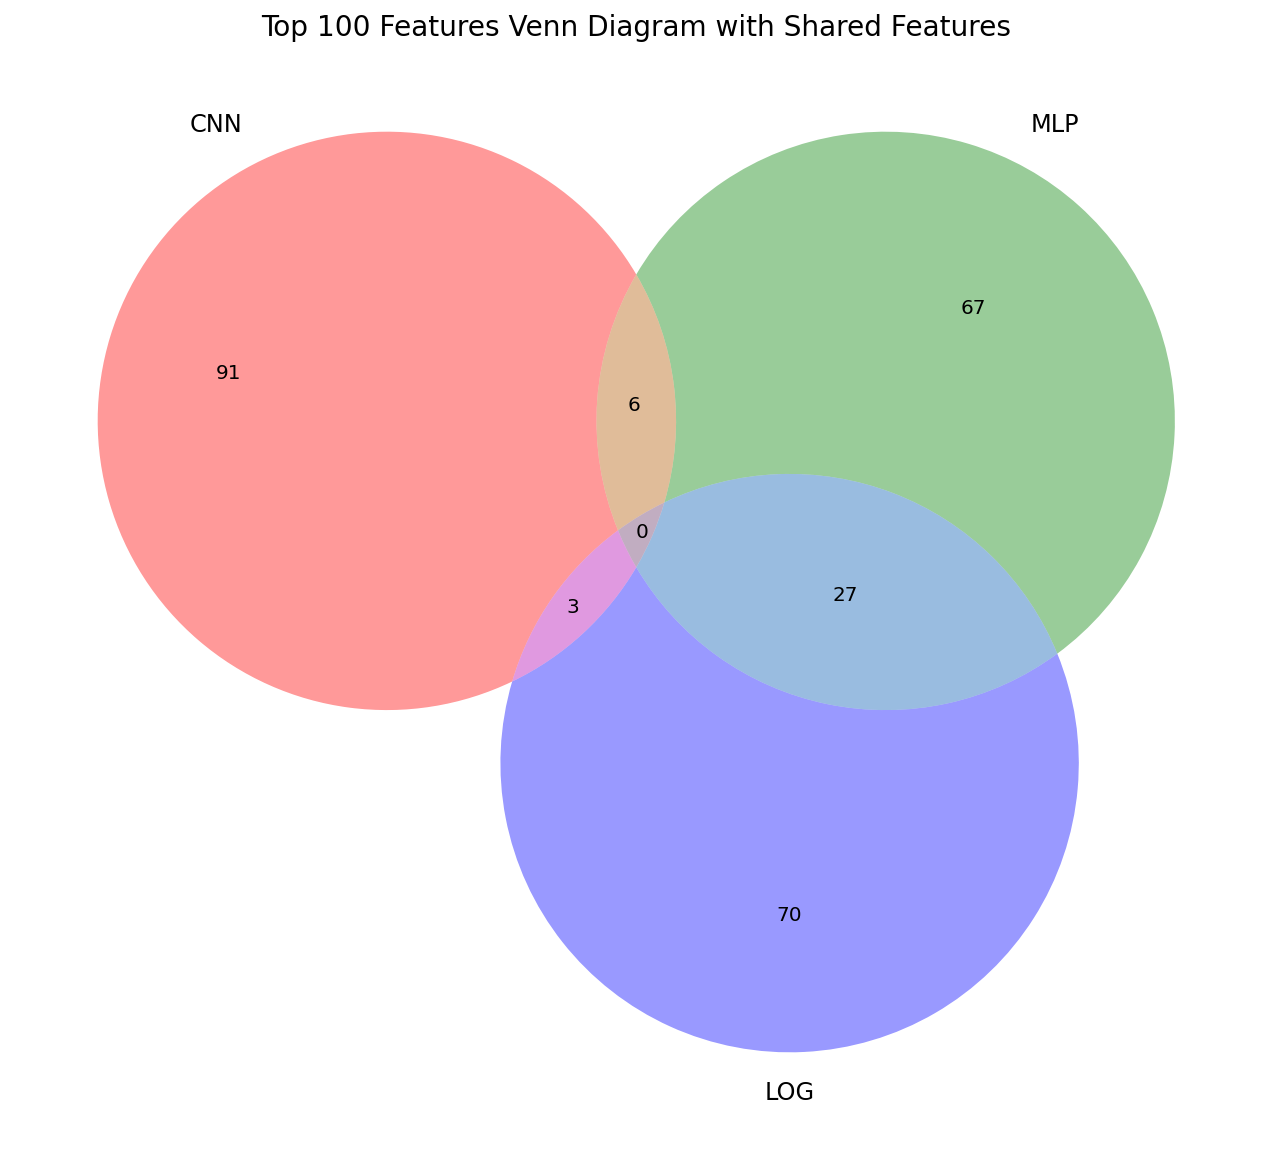

In [10]:
# load our importances
mlp_importances = functions.fetch_importances(GSE96058, './results/feature_importance/mlp_model')
cnn_importances = functions.fetch_importances(GSE96058, './results/feature_importance/cnn_model')
log_importances = functions.fetch_importances(GSE96058, './results/feature_importance/log_model')

    
functions.plot_top_features_venn([cnn_importances, mlp_importances, log_importances], top_n=100, 
                       total_features= 15133, show_annotations = False)


Simulation Progress: 100%|████████████████████| 50/50 [1:22:23<00:00, 98.86s/it]


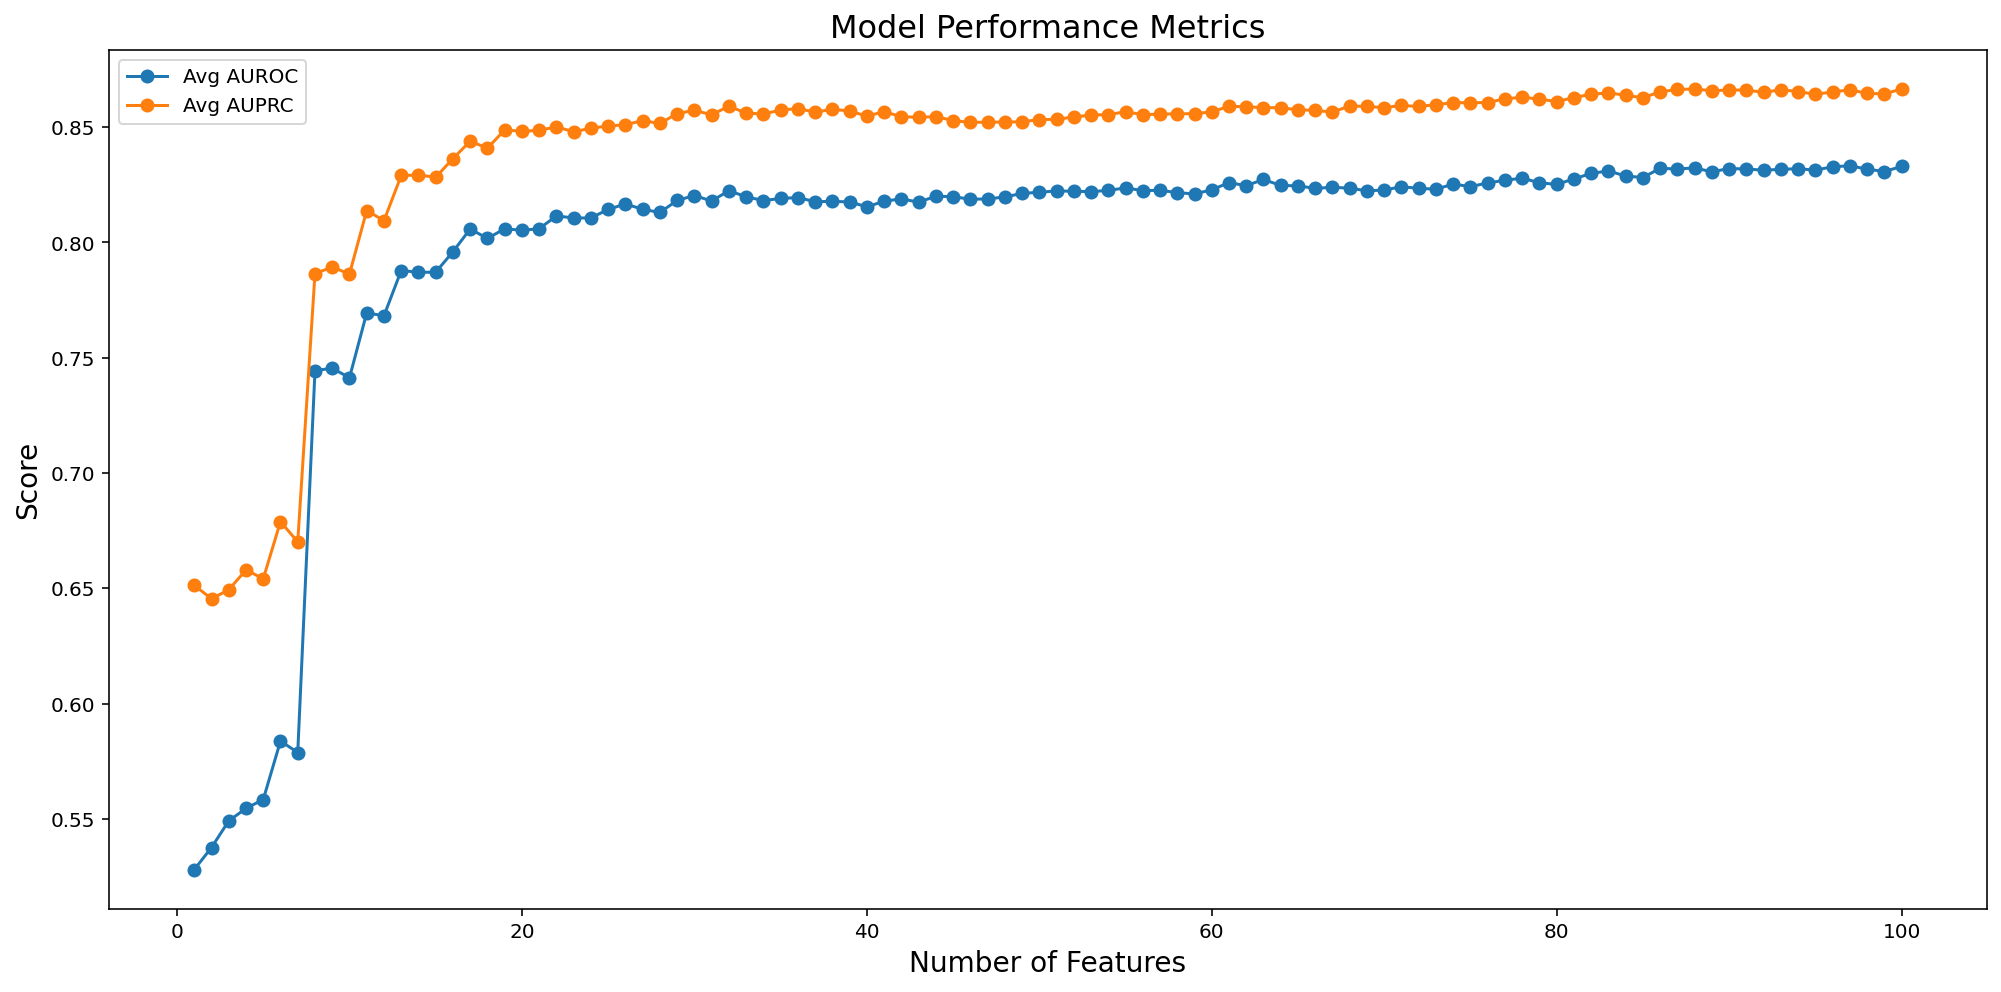

In [26]:
# Generate Feature Amount Variable MLP Performance for Cuttoff Calculation
aurocs_mlp, auprcs_mlp = functions.model_performance_analysis(x_train, y_train, x_test, y_test, 
                                                    'mlp', mlp_importances, min_features = 1, 
                                                    max_features = 100, sim_number = 50)

# Save MLP Feature Amount Variable Performance 
# NOTE - This will overwrite same name file
# functions.save_arrays(aurocs_mlp, auprcs_mlp, "mlp_model", "./results/utility")

Simulation Progress: 100%|██████████████████████| 50/50 [53:45<00:00, 64.50s/it]


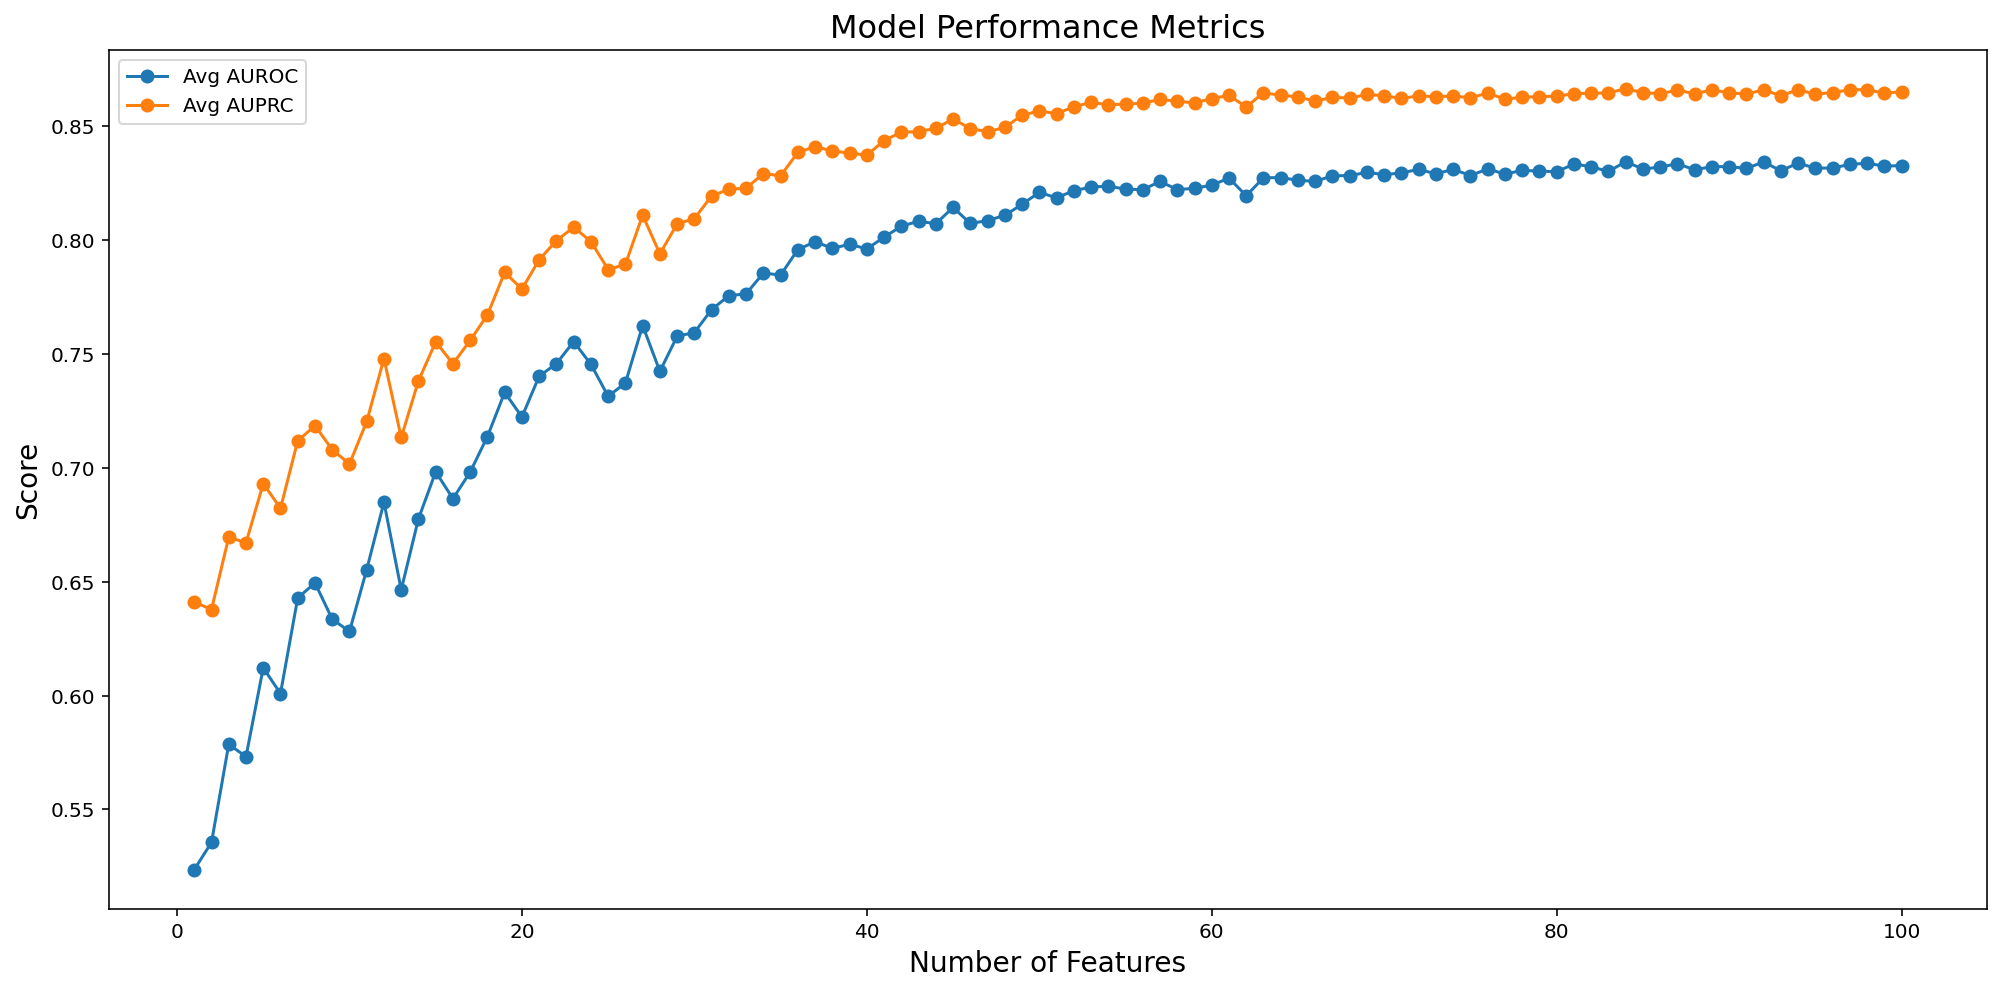

In [27]:
# Generate Feature Amount Variable LOG Performance for Cuttoff Calculation
aurocs_log, auprcs_log = functions.model_performance_analysis(x_train, y_train, x_test, y_test, 
                                                    'log', log_importances, min_features = 1,
                                                    max_features = 100, sim_number = 50)

# Save LOG Feature Amount Variable Performance 
# NOTE - This will overwrite same name file
# functions.save_arrays(aurocs_log, auprcs_log, "log_model", "./results/utility")


Simulation Progress: 100%|███████████████████| 50/50 [1:44:05<00:00, 124.92s/it]


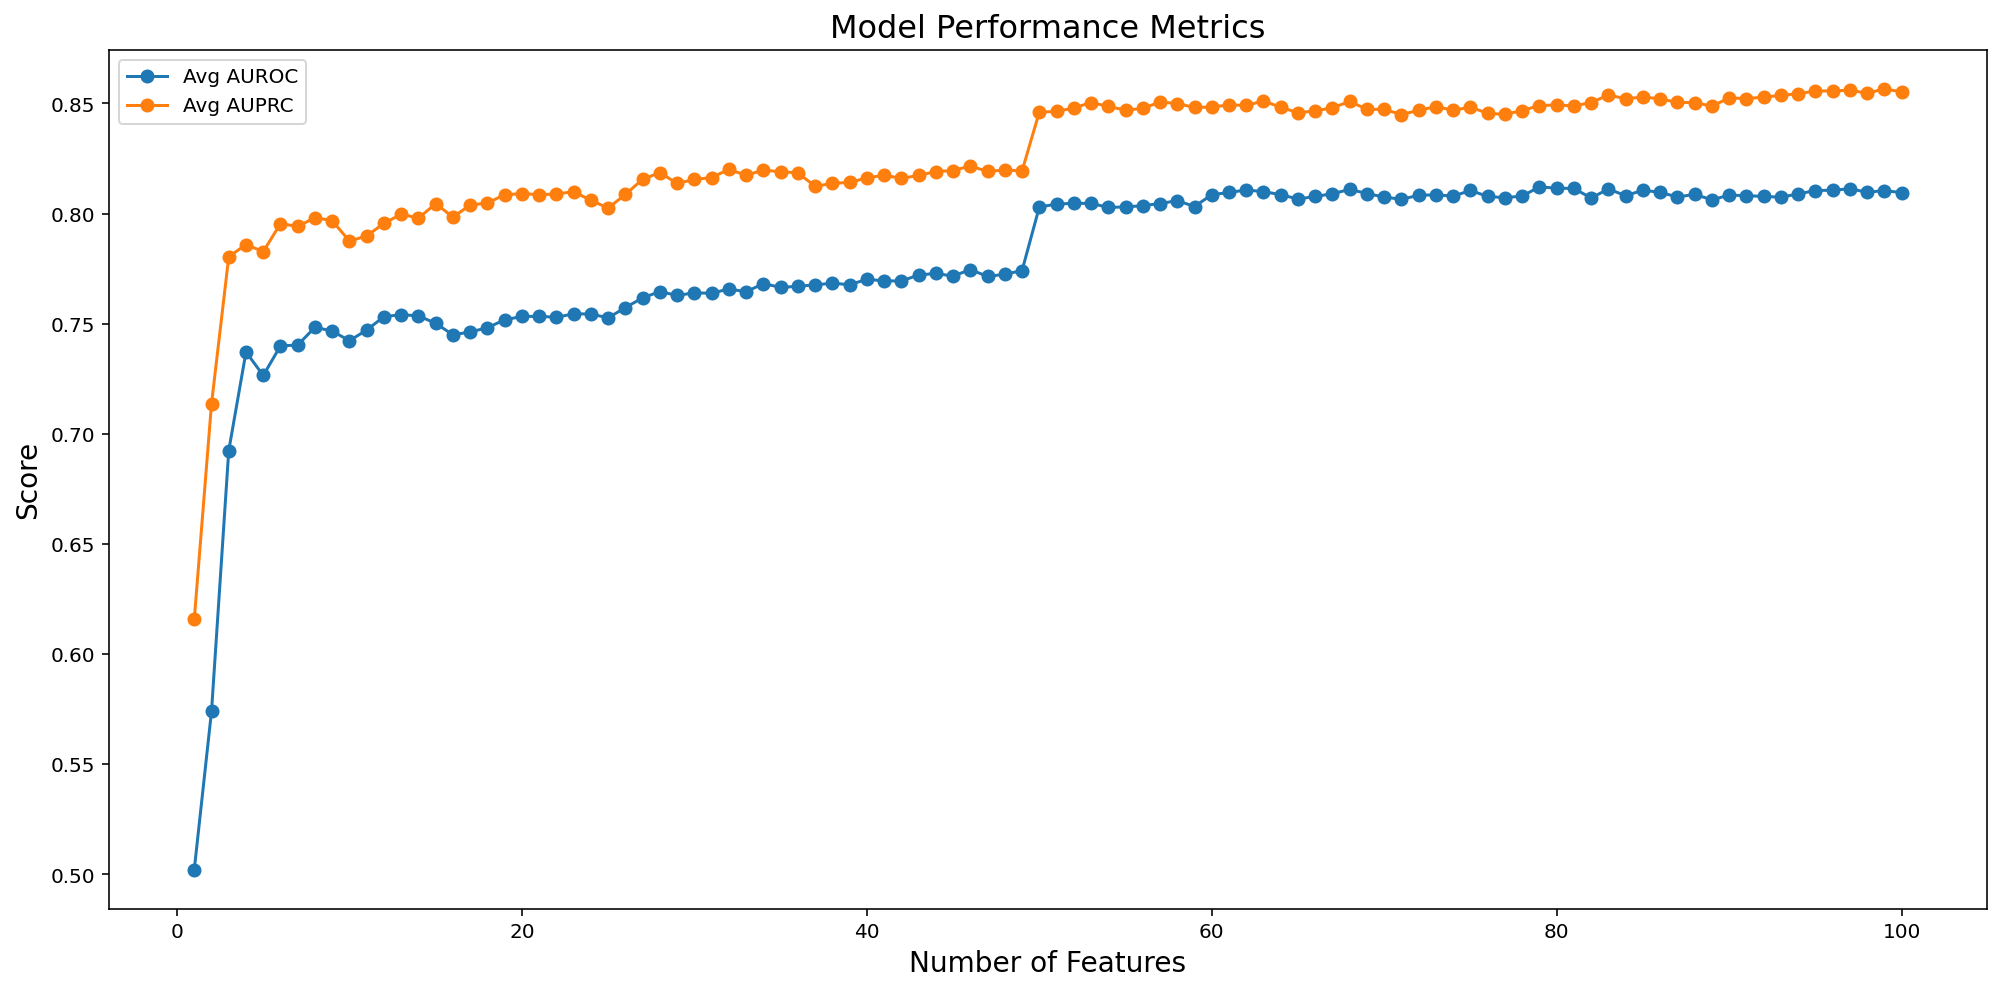

In [28]:
# Generate Feature Amount Variable CNN Performance for Cuttoff Calculation
aurocs_cnn, auprcs_cnn = functions.model_performance_analysis(x_train, y_train, x_test, y_test, 
                                                    'cnn', cnn_importances, min_features = 1,
                                                    max_features = 100, sim_number = 50)

# Save CNN Feature Amount Variable Performance 
# NOTE - This will overwrite same name file
# functions.save_arrays(aurocs_cnn, auprcs_cnn, "cnn_model", "./results/utility")


In [11]:
# load feature amount performances
aurocs_log, auprcs_log = functions.load_arrays("log_model", "./results/utility")
aurocs_mlp, auprcs_mlp = functions.load_arrays("mlp_model", "./results/utility")
aurocs_cnn, auprcs_cnn = functions.load_arrays("cnn_model", "./results/utility")

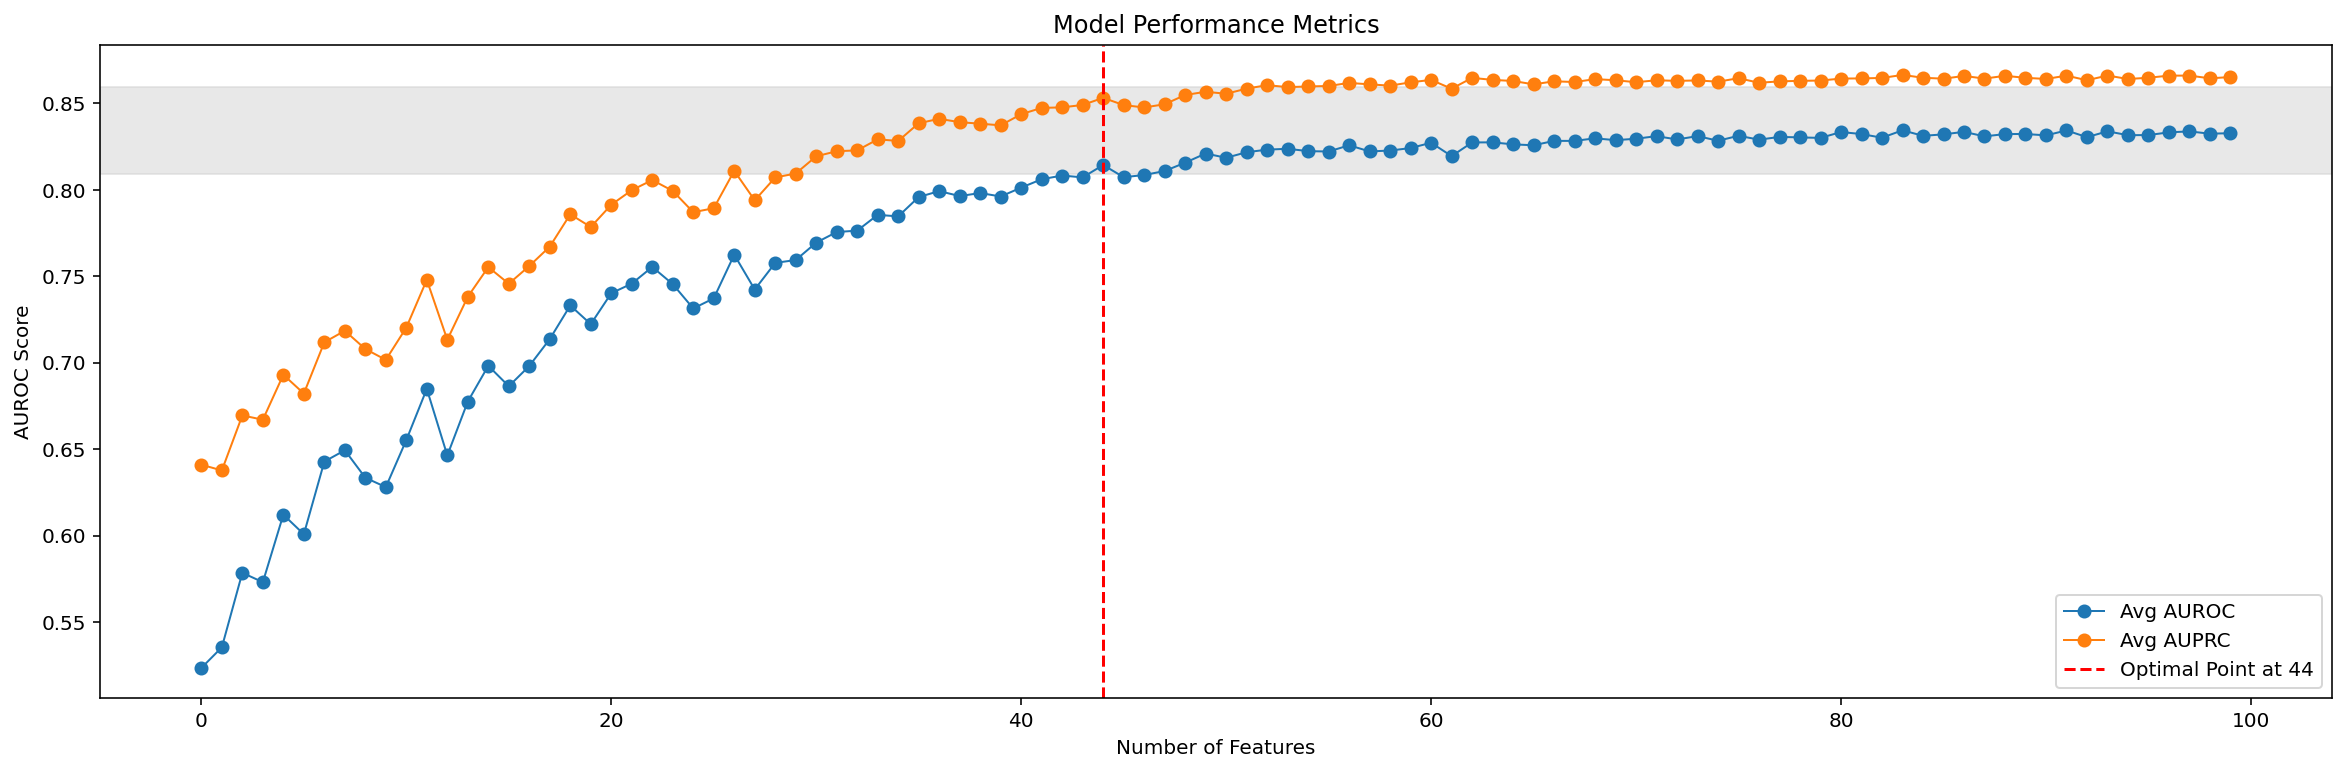

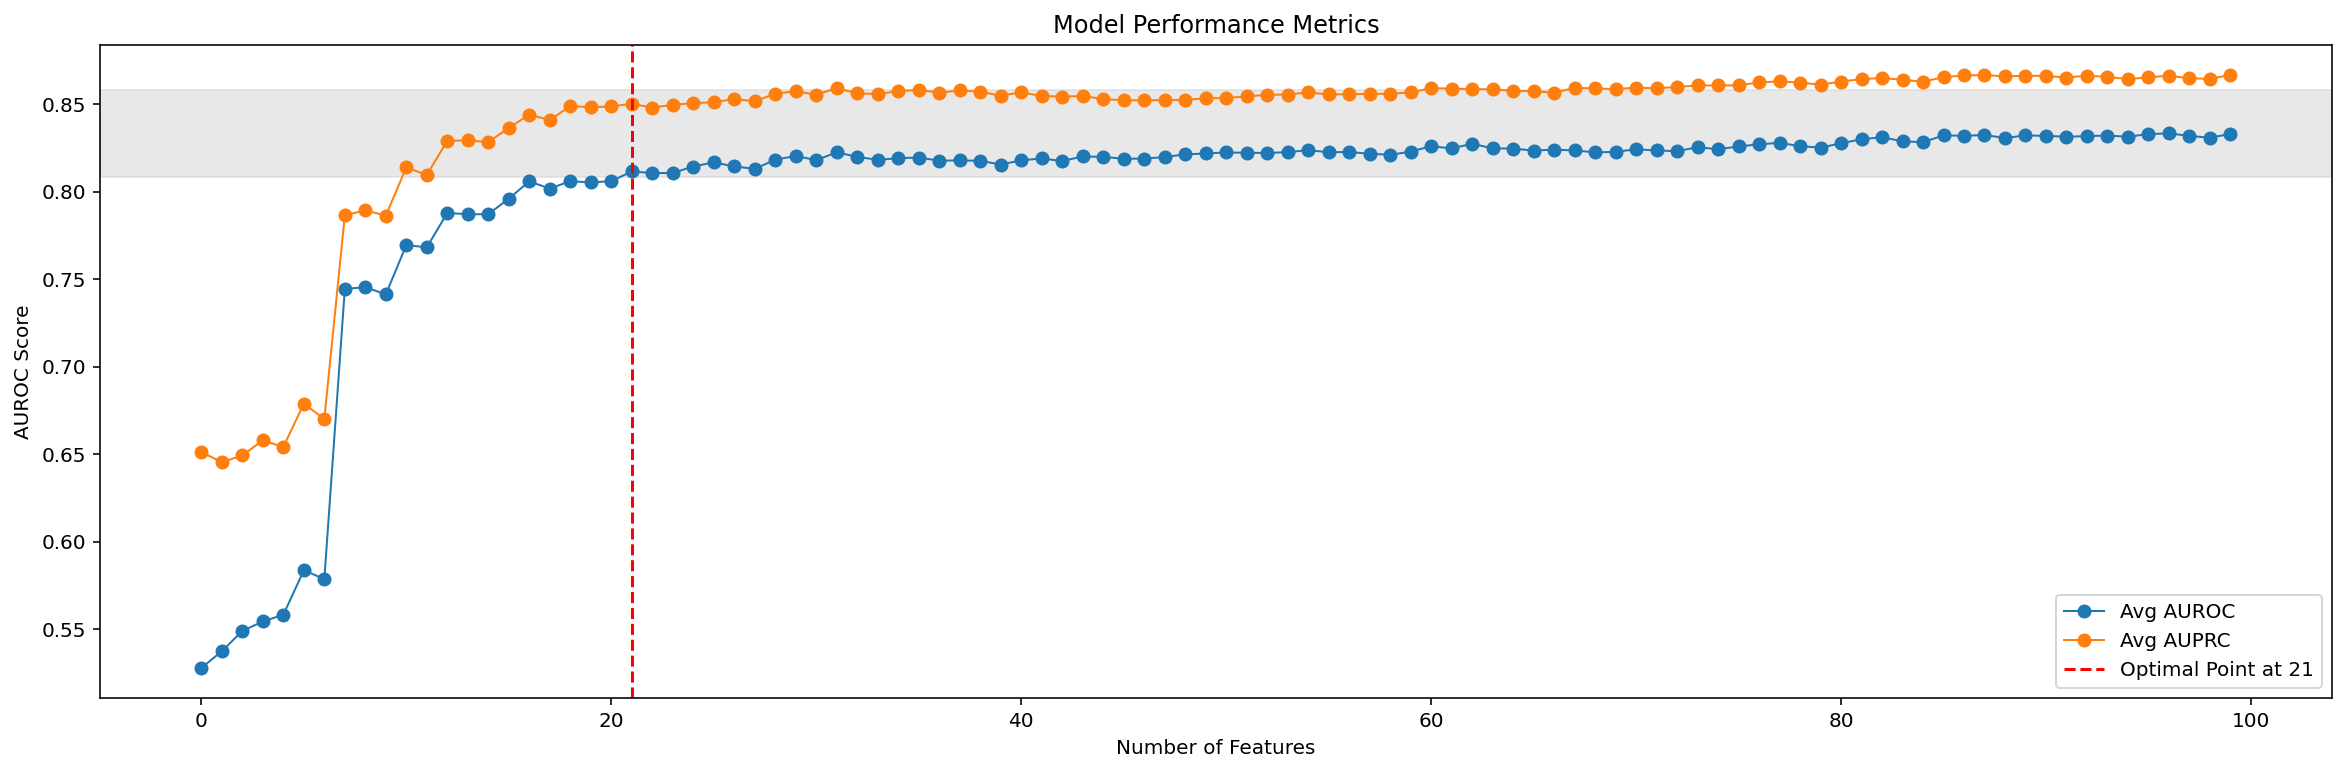

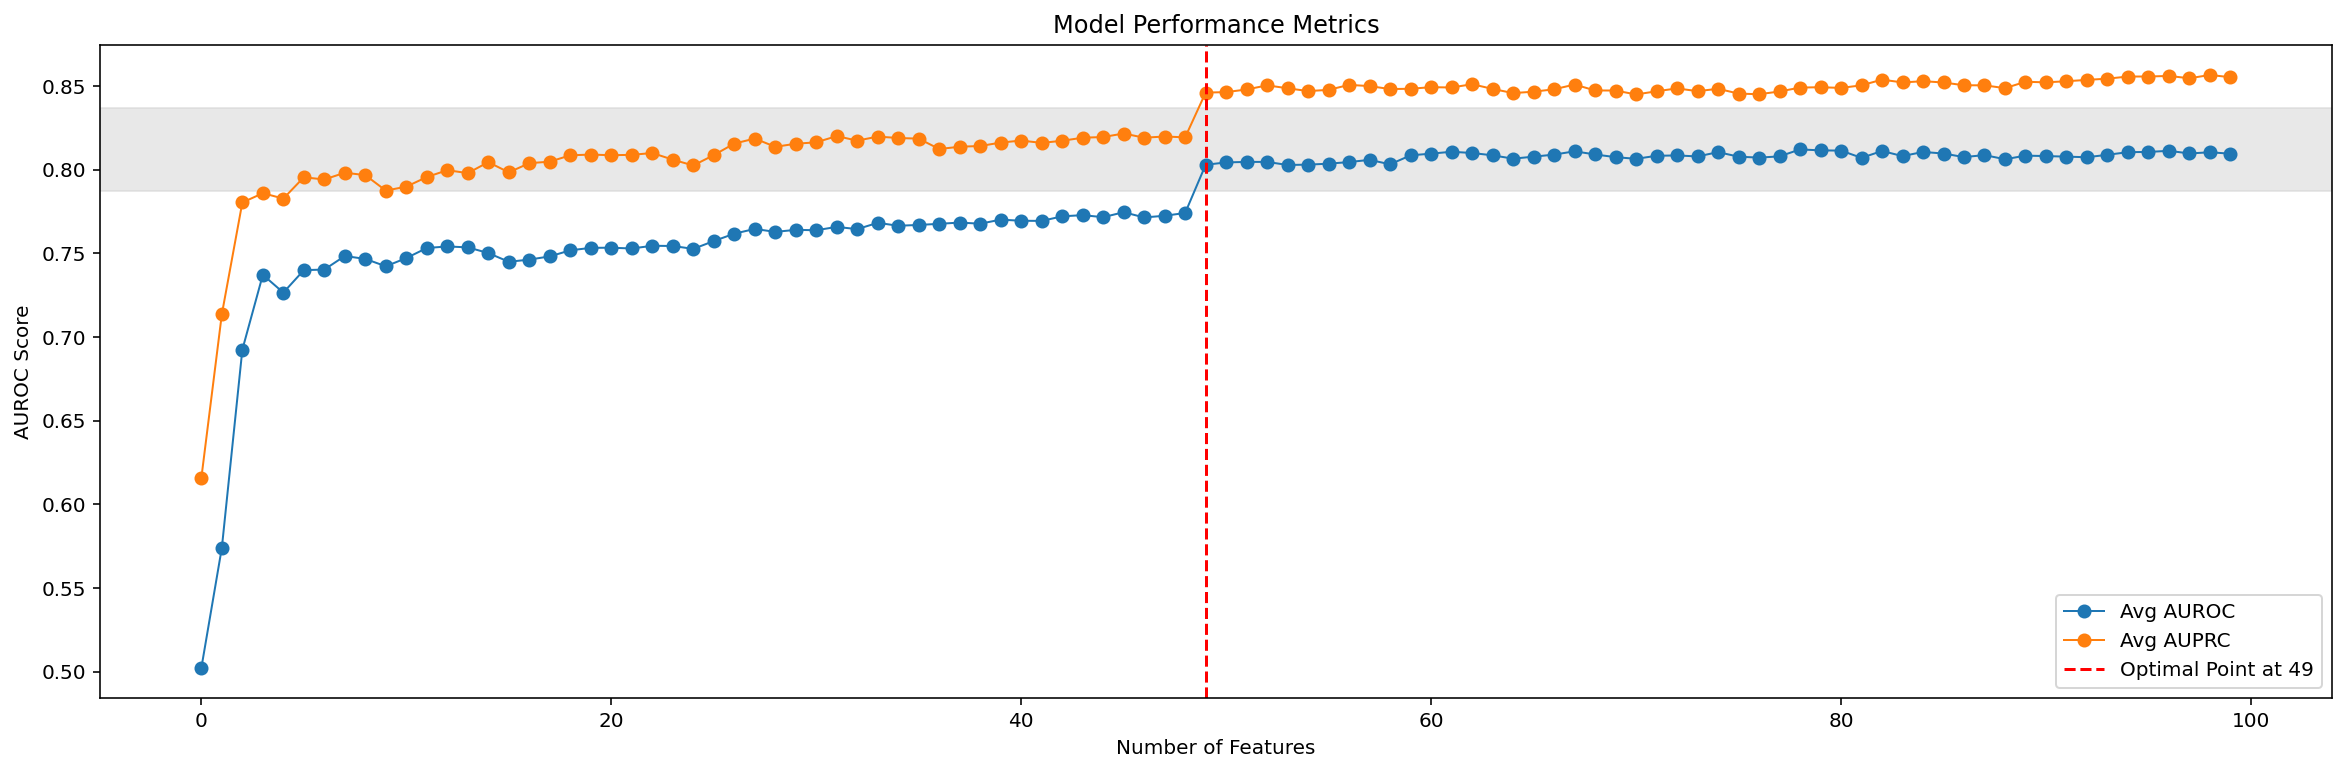

In [12]:
# generate feature amount cutoffs
highlight_value = 0.025 # 0.005
log_optimal_point = functions.detect_cuttoff_gene(aurocs_log, highlight_value)
functions.plot_with_cuttoff_gene(aurocs_log, auprcs_log, log_optimal_point, highlight_value)

mlp_optimal_point = functions.detect_cuttoff_gene(aurocs_mlp, highlight_value)
functions.plot_with_cuttoff_gene(aurocs_mlp, auprcs_mlp, mlp_optimal_point, highlight_value)

cnn_optimal_point = functions.detect_cuttoff_gene(aurocs_cnn, highlight_value)
functions.plot_with_cuttoff_gene(aurocs_cnn, auprcs_cnn, cnn_optimal_point, highlight_value)


In [13]:
# print critical LOG genes
functions.print_first_n_indices(log_importances, log_optimal_point)


TACC3
KLHDC7A
HOXC12
NEIL3
MKI67
TFPI2
GAL3ST2
YBX2
SYT13
GYPE
CDC20
TROAP
TBC1D3
NCAPH
GREB1L
LTF
PPP2R2C
CDC25A
EDARADD
TONSL
RBP7
KAAG1
ANKRD30B
PCDHA11
DNAH2
CENPA
FOXI1
AURKB
RECQL4
PLK1
RGS1
ATP6V0A4
PKMYT1
CCNA2
FAM83D
SLC16A9
NEK10
KIF11
ENTPD8
CIT
CDSN
DCDC2
XDH
IGDCC3


In [14]:
# print critical MLP genes
functions.print_first_n_indices(mlp_importances, mlp_optimal_point)


MFSD6L
TNNI3
TNNT1
FOXI1
HOMER2
DNAH2
TDRD5
KIF11
MRAP
CYFIP2
ISG15
AQP7
MKI67
IFI6
CAMK2B
TACC3
NBPF3
TPH1
TPRG1
TFB2M
CDC20


In [16]:
# print critical CNN genes
functions.print_first_n_indices(cnn_importances, cnn_optimal_point)


TDRD1
GRIK3
SLC7A4
LRP2
BEX2
AGTR1
CKMT1B
SLC4A4
ENPP5
CKMT1A
RAB40A
IER2
AGXT2
PLCH2
IGFALS
PCDHA1
TAL2
OGDHL
HSP90AA1
GRB14
GABRB3
CBWD3
NRIP3
SOWAHA
ESRRG
TAS2R10
ATP1A3
NPY5R
CNTF
PAX2
COL4A6
TMC3
JUNB
ARHGEF38
HS6ST3
SH3BGR
IQUB
AHSA1
DUSP4
SELE
IGFL3
NOXRED1
IRF7
KRT15
DAOA
MAPK4
ANAPC10
TMPRSS6
POLQ


In [49]:
run_numb = 100

100%|█████████████████████████████████████████| 100/100 [01:03<00:00,  1.57it/s]


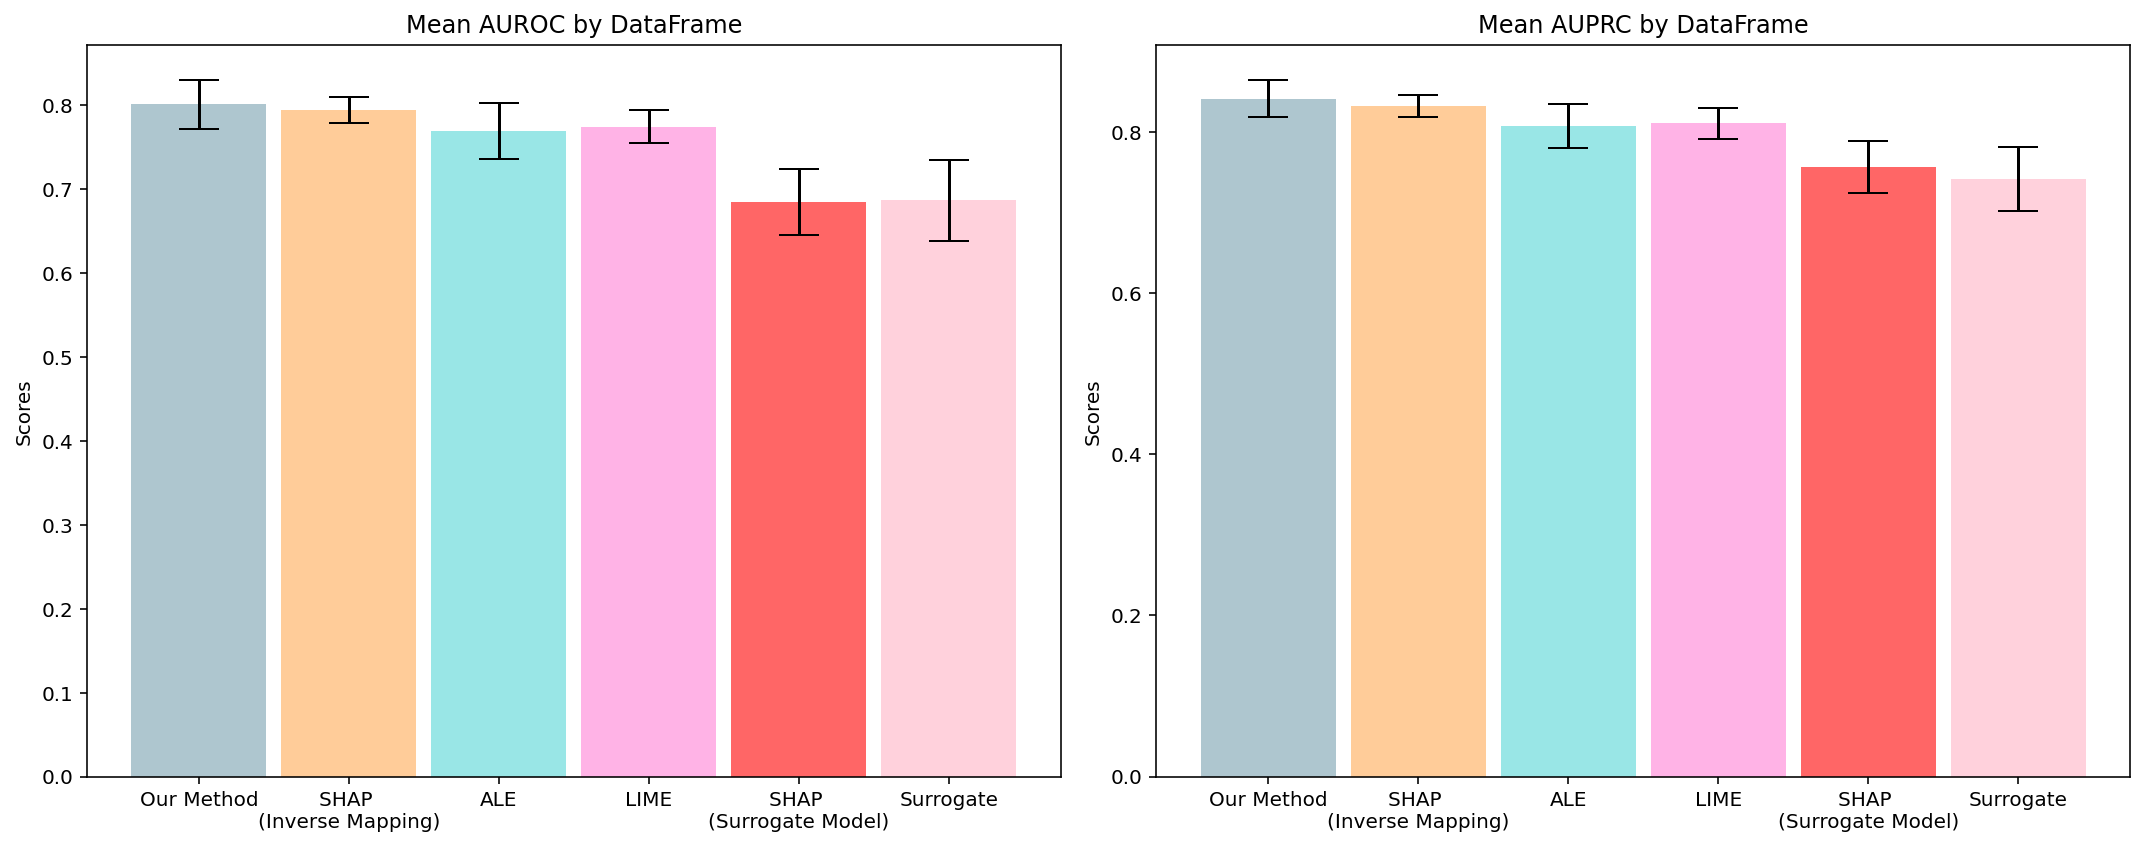

In [50]:
# simulate LOG model using top genes from various feature selection methedologies
log_auroc_comparison,log_auprc_comparison = functions.simulate_model_performance(x_train, y_train, x_test, y_test,
                                                                      "log", [log_importances, 
                                                                              log_shapinv_importances,
                                                                              log_ale_importances,
                                                                              log_lime_importances,
                                                                              log_shap_importances,
                                                                              log_surgate_importances],
                                                                      log_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


100%|█████████████████████████████████████████| 100/100 [01:36<00:00,  1.03it/s]


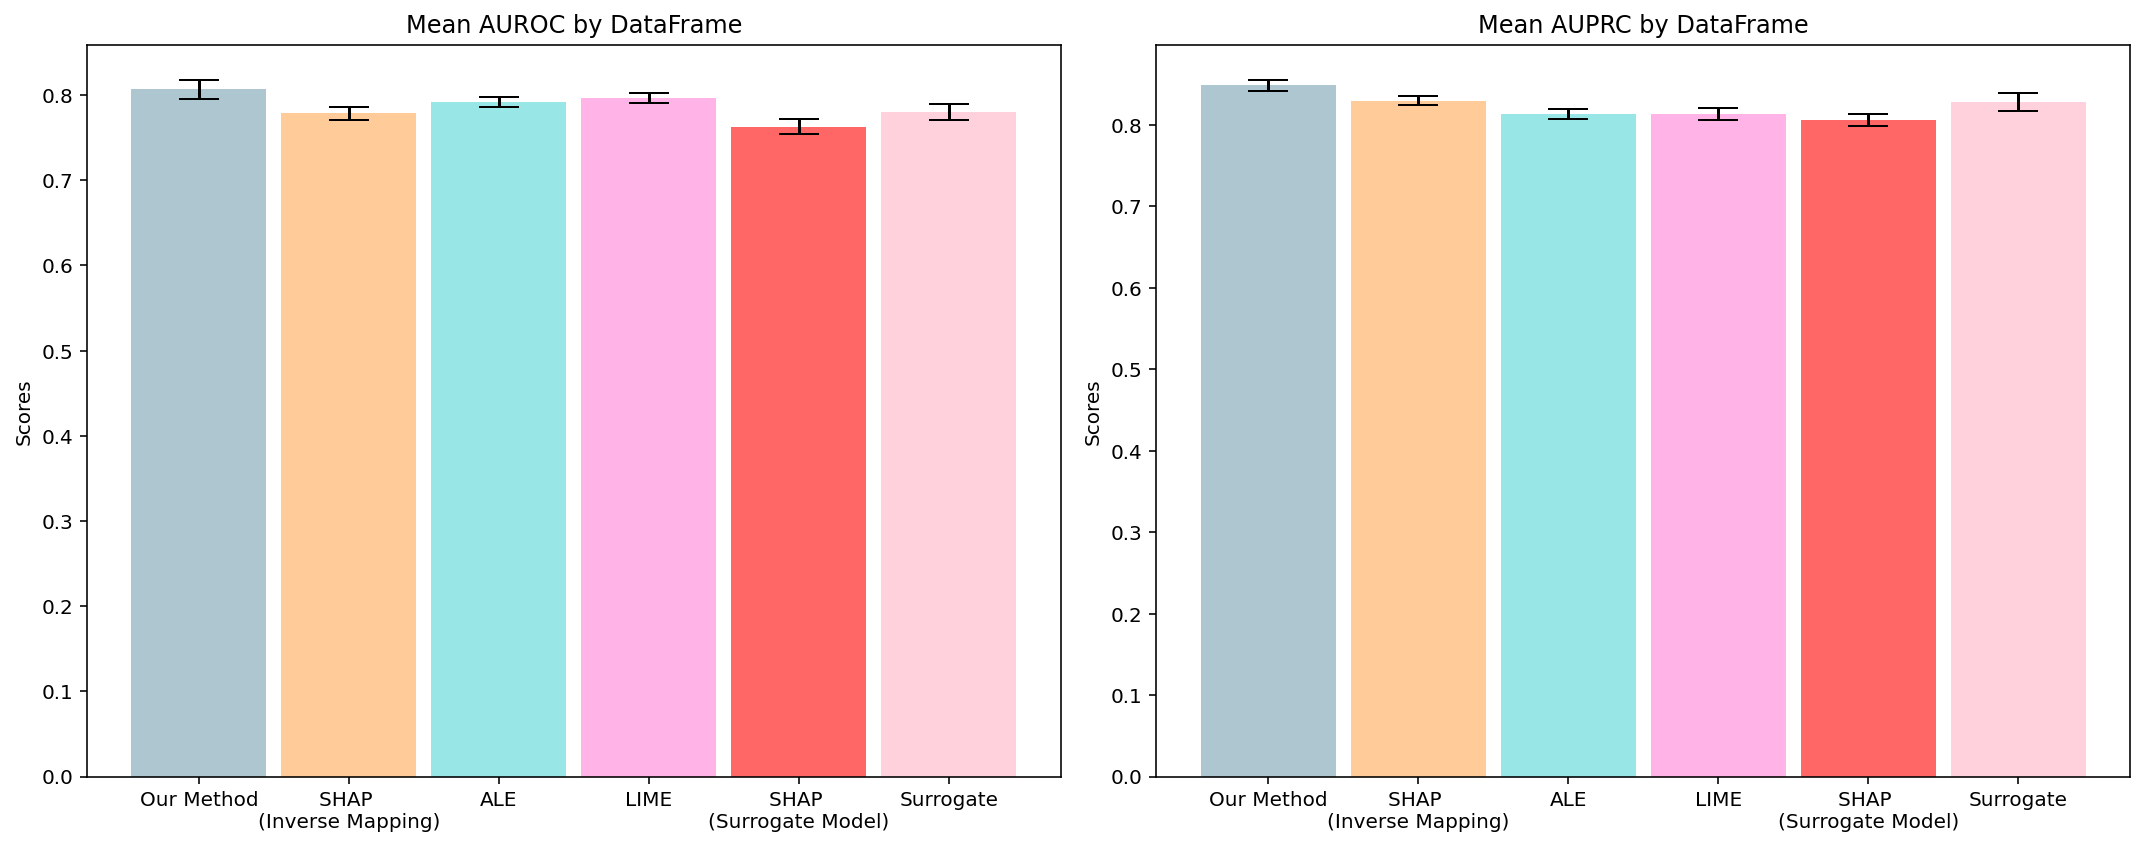

In [51]:
# simulate MLP model using top genes from various feature selection methedologies
mlp_auroc_comparison,mlp_auprc_comparison = functions.simulate_model_performance(x_train, y_train, x_test, y_test,
                                                                      "mlp", [mlp_importances, 
                                                                              mlp_shapinv_importances,
                                                                              mlp_ale_importances,
                                                                              mlp_lime_importances,
                                                                              mlp_shap_importances,
                                                                              mlp_surgate_importances],
                                                                      mlp_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


100%|█████████████████████████████████████████| 100/100 [02:26<00:00,  1.47s/it]


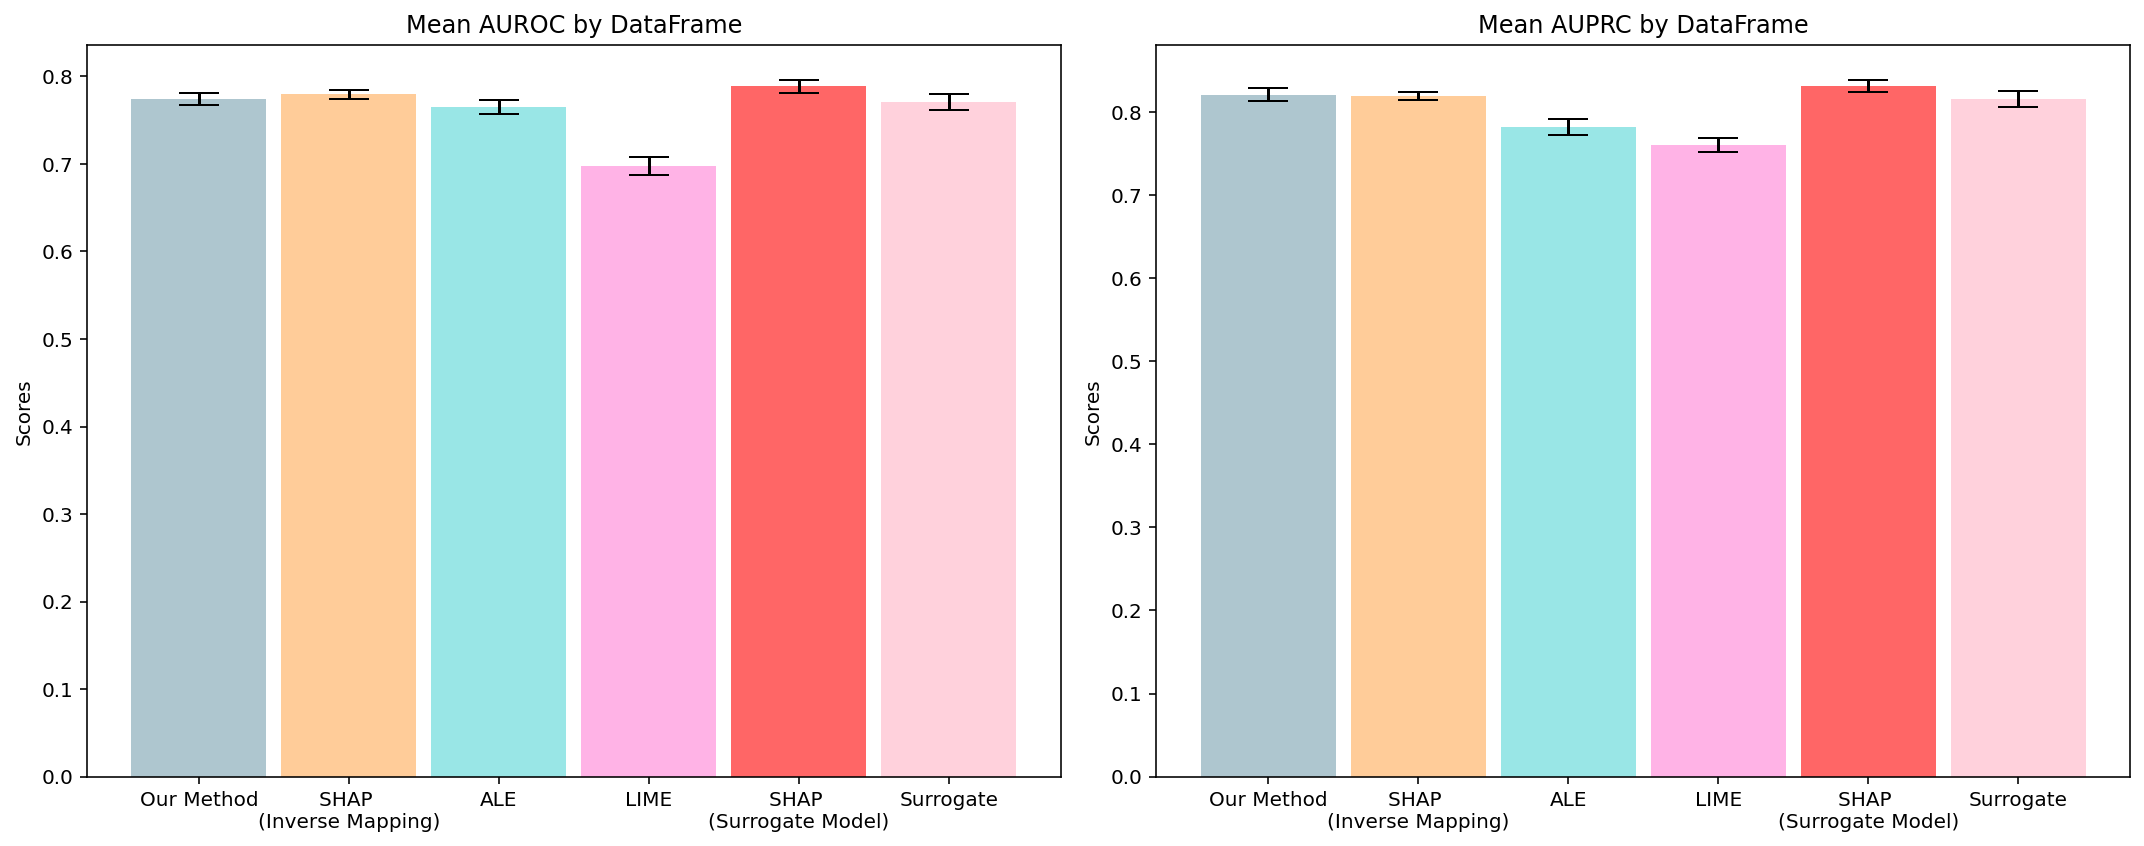

In [52]:
# simulate CNN model using top genes from various feature selection methedologies
cnn_auroc_comparison,cnn_auprc_comparison = functions.simulate_model_performance(x_train, y_train, x_test, y_test,
                                                                      "cnn", [cnn_importances, 
                                                                              cnn_shapinv_importances,
                                                                              cnn_ale_importances,
                                                                              cnn_lime_importances,
                                                                              cnn_shap_importances,
                                                                              cnn_surgate_importances],
                                                                      cnn_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


In [17]:
# load and split original data (split so uploadable to Github)
# GSE81538 = functions.data_load('./data/GSE81538.csv')
# functions.split_csv('./data/GSE81538.csv', './data/GSE81538')

# merge and load data train test split
GSE81538 = functions.merge_load_csv('./data/GSE81538')
x_total_GSE81538 = GSE81538.drop('output', axis=1, level=0)  
y_total_GSE81538 = GSE81538['output'].squeeze()

data shape: (405, 15133)
Data split into 7 chunks in the folder './data/GSE81538'.
data shape: (405, 15133)


100%|█████████████████████████████████████████| 100/100 [01:10<00:00,  1.41it/s]


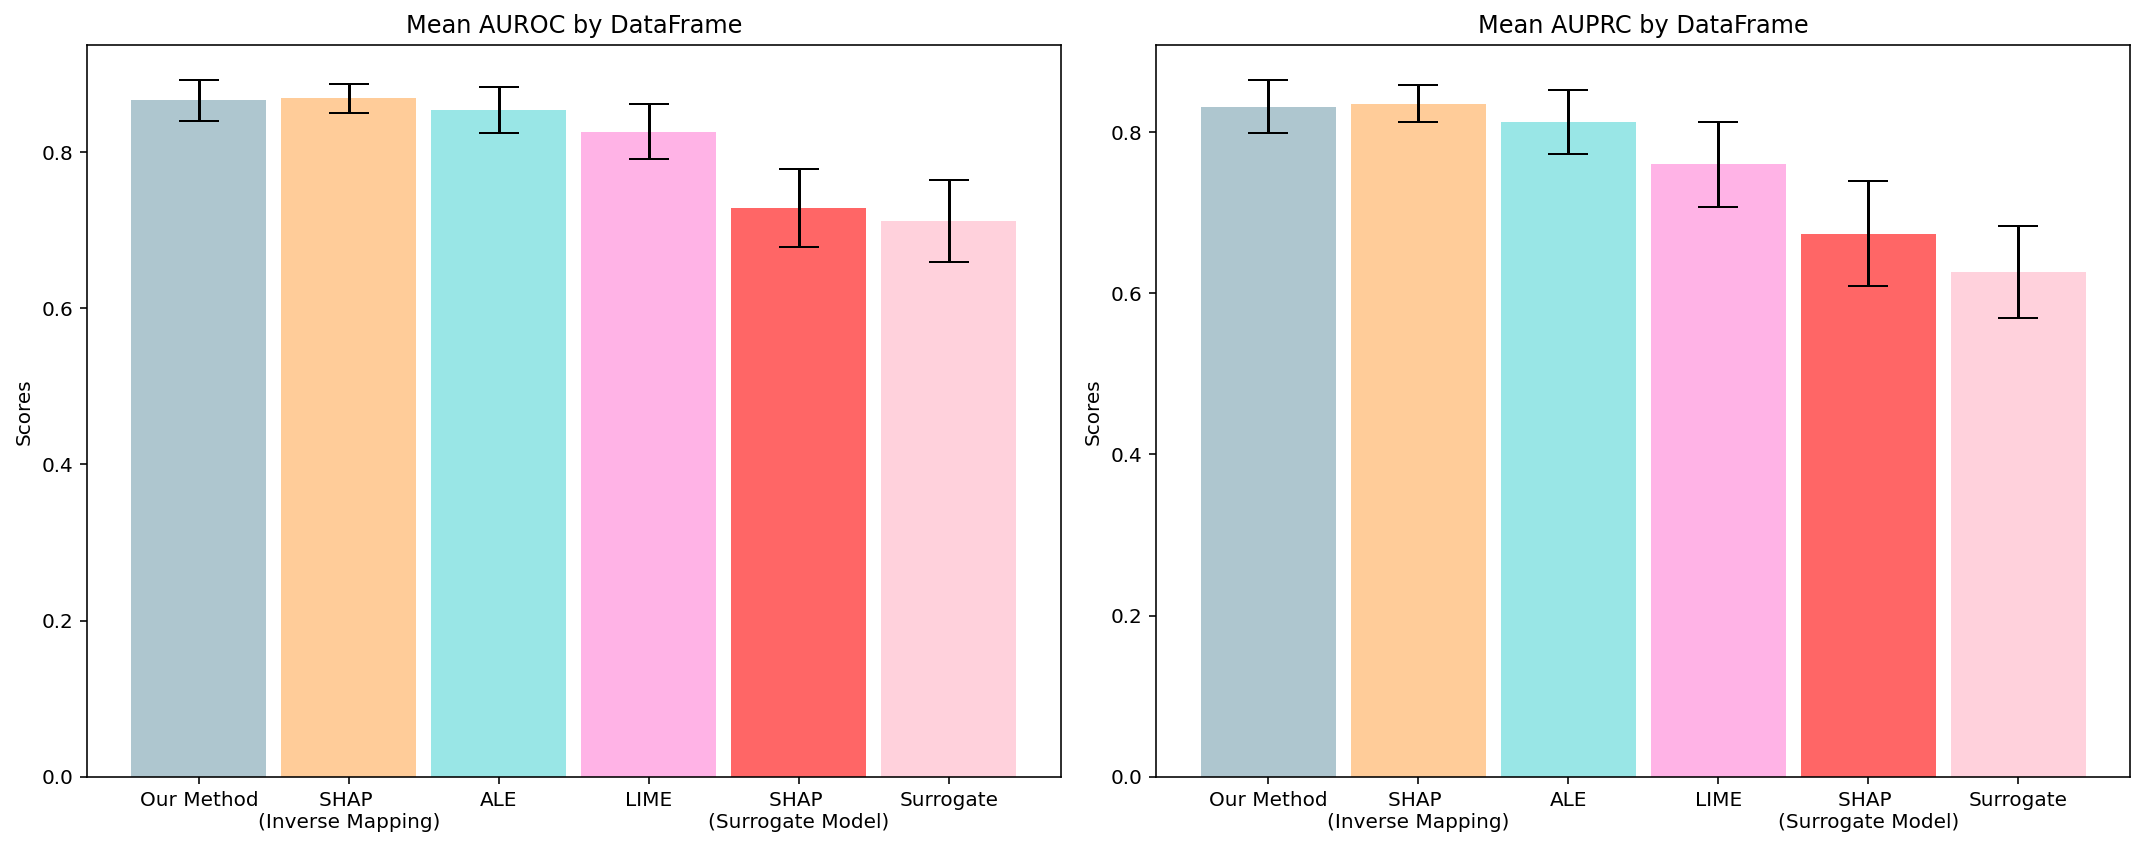

In [54]:
# simulate LOG model using top genes from various feature selection methedologies (GSE81538 dataset)
log_auroc_comparison2,log_auprc_comparison2 = functions.simulate_model_performance(x_train, y_train, x_total_GSE81538, y_total_GSE81538,
                                                                      "log", [log_importances, 
                                                                              log_shapinv_importances,
                                                                              log_ale_importances,
                                                                              log_lime_importances,
                                                                              log_shap_importances,
                                                                              log_surgate_importances],
                                                                      log_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.04s/it]


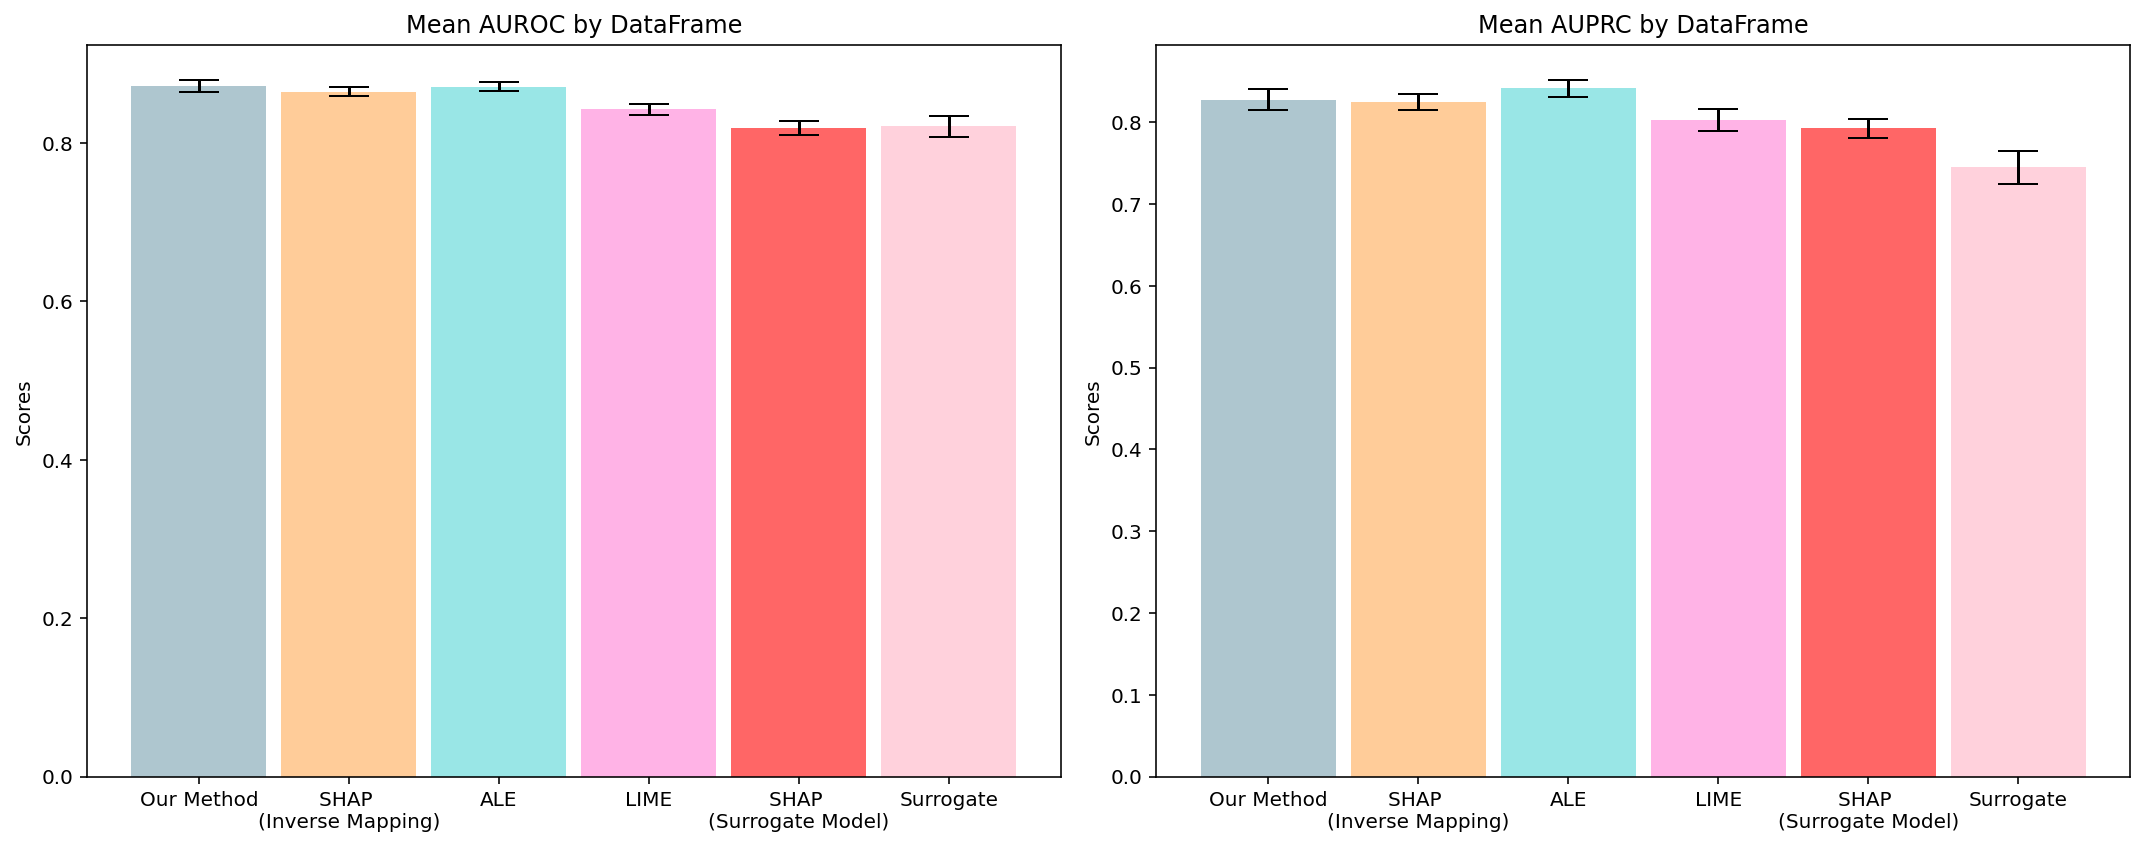

In [55]:
# simulate MLP model using top genes from various feature selection methedologies (GSE81538 dataset)
mlp_auroc_comparison2, mlp_auprc_comparison2 = functions.simulate_model_performance(x_train, y_train, x_total_GSE81538, y_total_GSE81538,
                                                                      "mlp", [mlp_importances, 
                                                                              mlp_shapinv_importances,
                                                                              mlp_ale_importances,
                                                                              mlp_lime_importances,
                                                                              mlp_shap_importances,
                                                                              mlp_surgate_importances],
                                                                      mlp_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


100%|█████████████████████████████████████████| 100/100 [02:33<00:00,  1.53s/it]


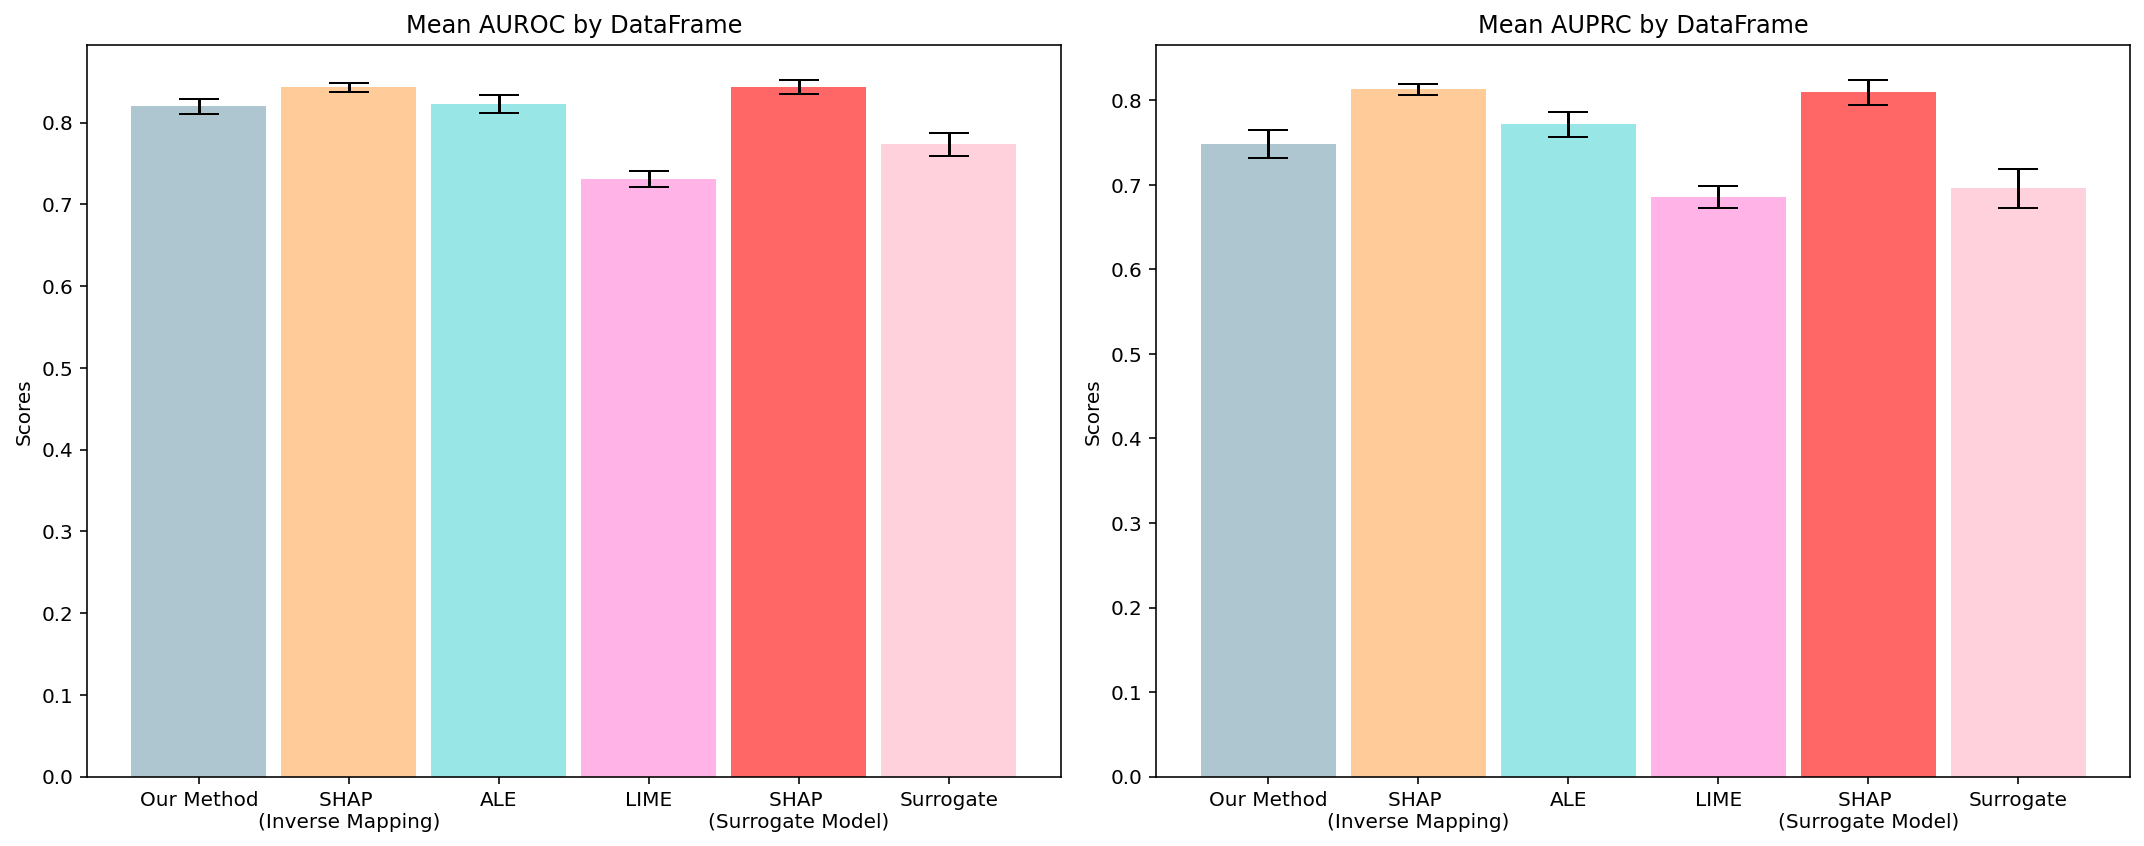

In [56]:
# simulate CNN model using top genes from various feature selection methedologies (GSE81538 dataset)
cnn_auroc_comparison2,cnn_auprc_comparison2 = functions.simulate_model_performance(x_train, y_train, x_total_GSE81538, y_total_GSE81538,
                                                                      "cnn", [cnn_importances, 
                                                                              cnn_shapinv_importances,
                                                                              cnn_ale_importances,
                                                                              cnn_lime_importances,
                                                                              cnn_shap_importances,
                                                                              cnn_surgate_importances],
                                                                      cnn_optimal_point, run_numb,
                                                                      labels = ['Our Method', 
                                                                                'SHAP \n(Inverse Mapping)',
                                                                                'ALE',
                                                                                'LIME', 
                                                                                'SHAP \n(Surrogate Model)', 
                                                                                'Surrogate'])


In [57]:
print(log_auroc_comparison)
print(mlp_auroc_comparison)
print(cnn_auroc_comparison)
print(log_auroc_comparison2)
print(mlp_auroc_comparison2)
print(cnn_auroc_comparison2)


['0.8003 ± 0.0293', '0.7939 ± 0.0154', '0.7687 ± 0.0332', '0.7739 ± 0.0192', '0.6841 ± 0.0388', '0.6862 ± 0.0481']
['0.8066 ± 0.0112', '0.7784 ± 0.0075', '0.7917 ± 0.0055', '0.7965 ± 0.0053', '0.7626 ± 0.0089', '0.7803 ± 0.0094']
['0.7743 ± 0.0067', '0.7795 ± 0.0054', '0.7650 ± 0.0082', '0.6976 ± 0.0107', '0.7888 ± 0.0073', '0.7707 ± 0.0089']
['0.8666 ± 0.0262', '0.8689 ± 0.0185', '0.8538 ± 0.0294', '0.8261 ± 0.0353', '0.7285 ± 0.0502', '0.7119 ± 0.0523']
['0.8716 ± 0.0076', '0.8644 ± 0.0057', '0.8703 ± 0.0057', '0.8419 ± 0.0066', '0.8184 ± 0.0084', '0.8204 ± 0.0136']
['0.8200 ± 0.0092', '0.8430 ± 0.0051', '0.8229 ± 0.0111', '0.7311 ± 0.0096', '0.8438 ± 0.0084', '0.7733 ± 0.0139']


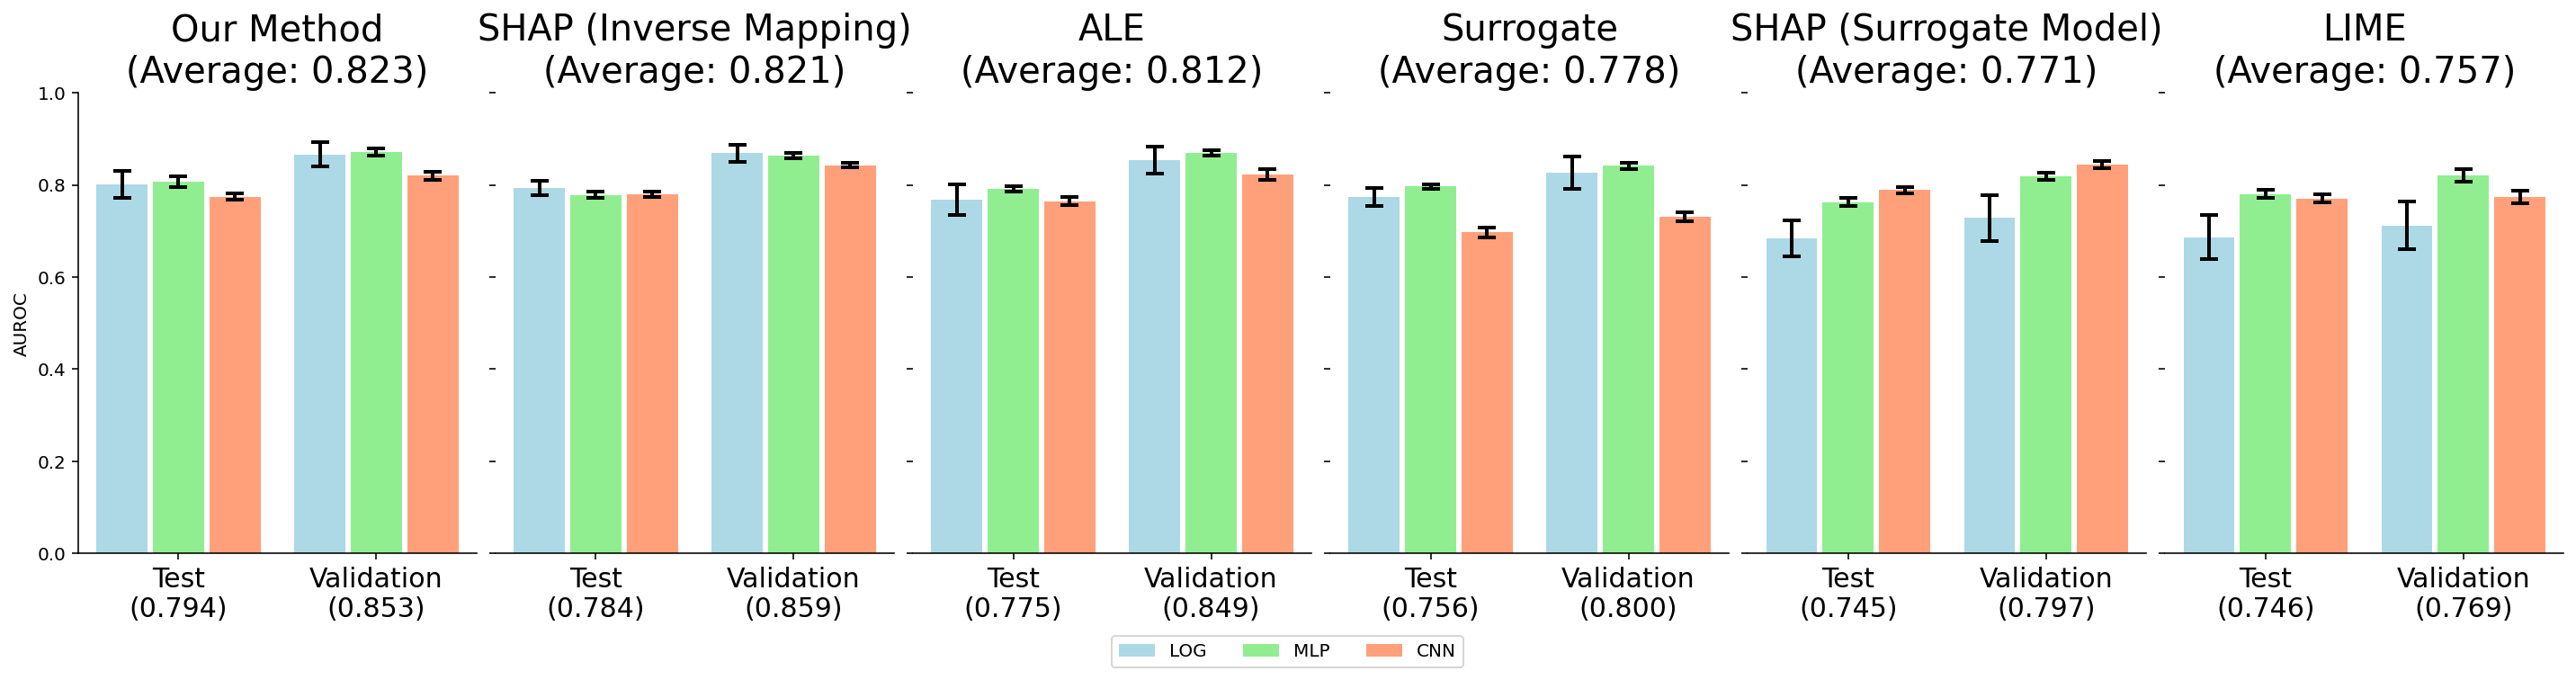

In [77]:
# Flatten the comparison groups by dataset
flattened_comparison_groups = [log_auroc_comparison, mlp_auroc_comparison, cnn_auroc_comparison,
                               log_auroc_comparison2, mlp_auroc_comparison2, cnn_auroc_comparison2]

# Plot performances by Test (GSE96058) and outside Validation (GSE81538) sets and by feature selection methedology
functions.rank_and_plot(['Our Method', 'SHAP (Inverse Mapping)','ALE','Surrogate', 'SHAP (Surrogate Model)', 'LIME'],
              *flattened_comparison_groups)


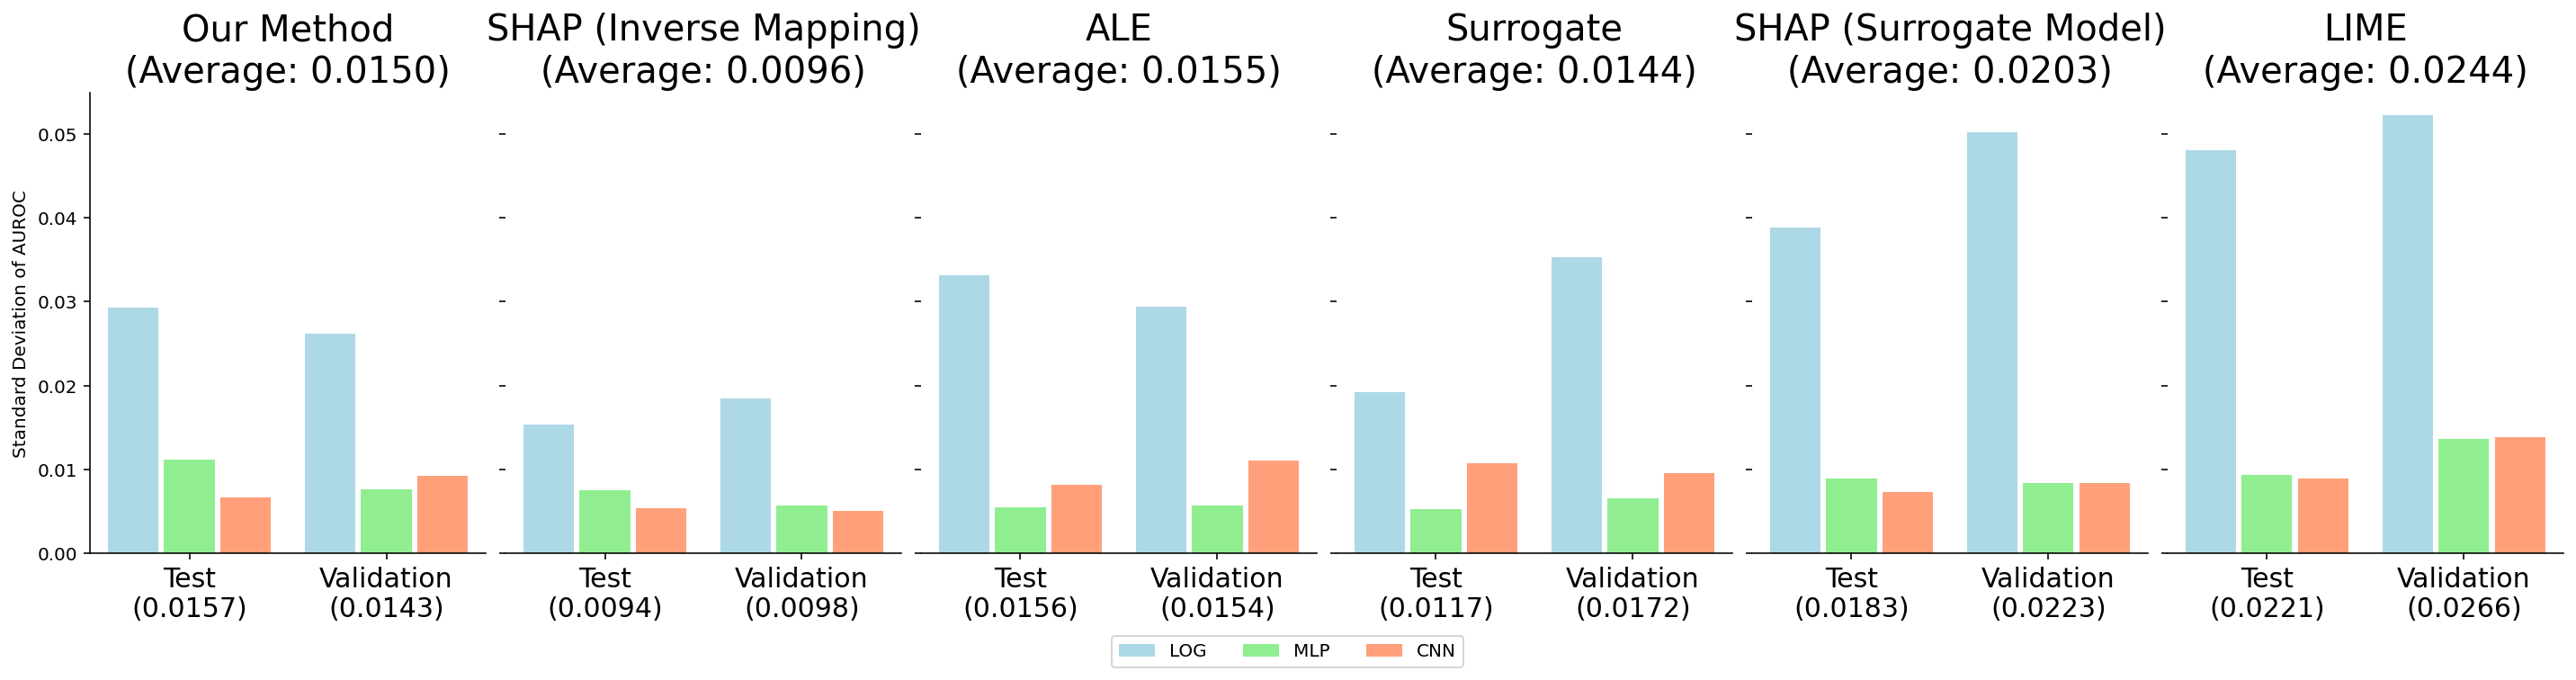

In [81]:
# Plot stability by Test (GSE96058) and outside Validation (GSE81538) sets and by feature selection methedology
functions.rank_and_plot_std(['Our Method', 'SHAP (Inverse Mapping)','ALE','Surrogate', 'SHAP (Surrogate Model)', 'LIME'],
              *flattened_comparison_groups)

In [18]:
# Load survival data
surv_dat = pd.read_csv('./data/GET96058_survival_data.csv', delimiter=',')
print(surv_dat.shape)

GSE96058_full = functions.merge_load_csv('./data/GSE96058')
x_full = GSE96058_full.iloc[:, 1:]  
y_full = GSE96058_full.iloc[:, 0].values


(3069, 15)
data shape: (1363, 15133)


Significantly Differentially Expressed:  39
Overexpressed:  23
Underexpressed:  16
Significantly Differentially Expressed:  17
Overexpressed:  8
Underexpressed:  9
Significantly Differentially Expressed:  40
Overexpressed:  9
Underexpressed:  31


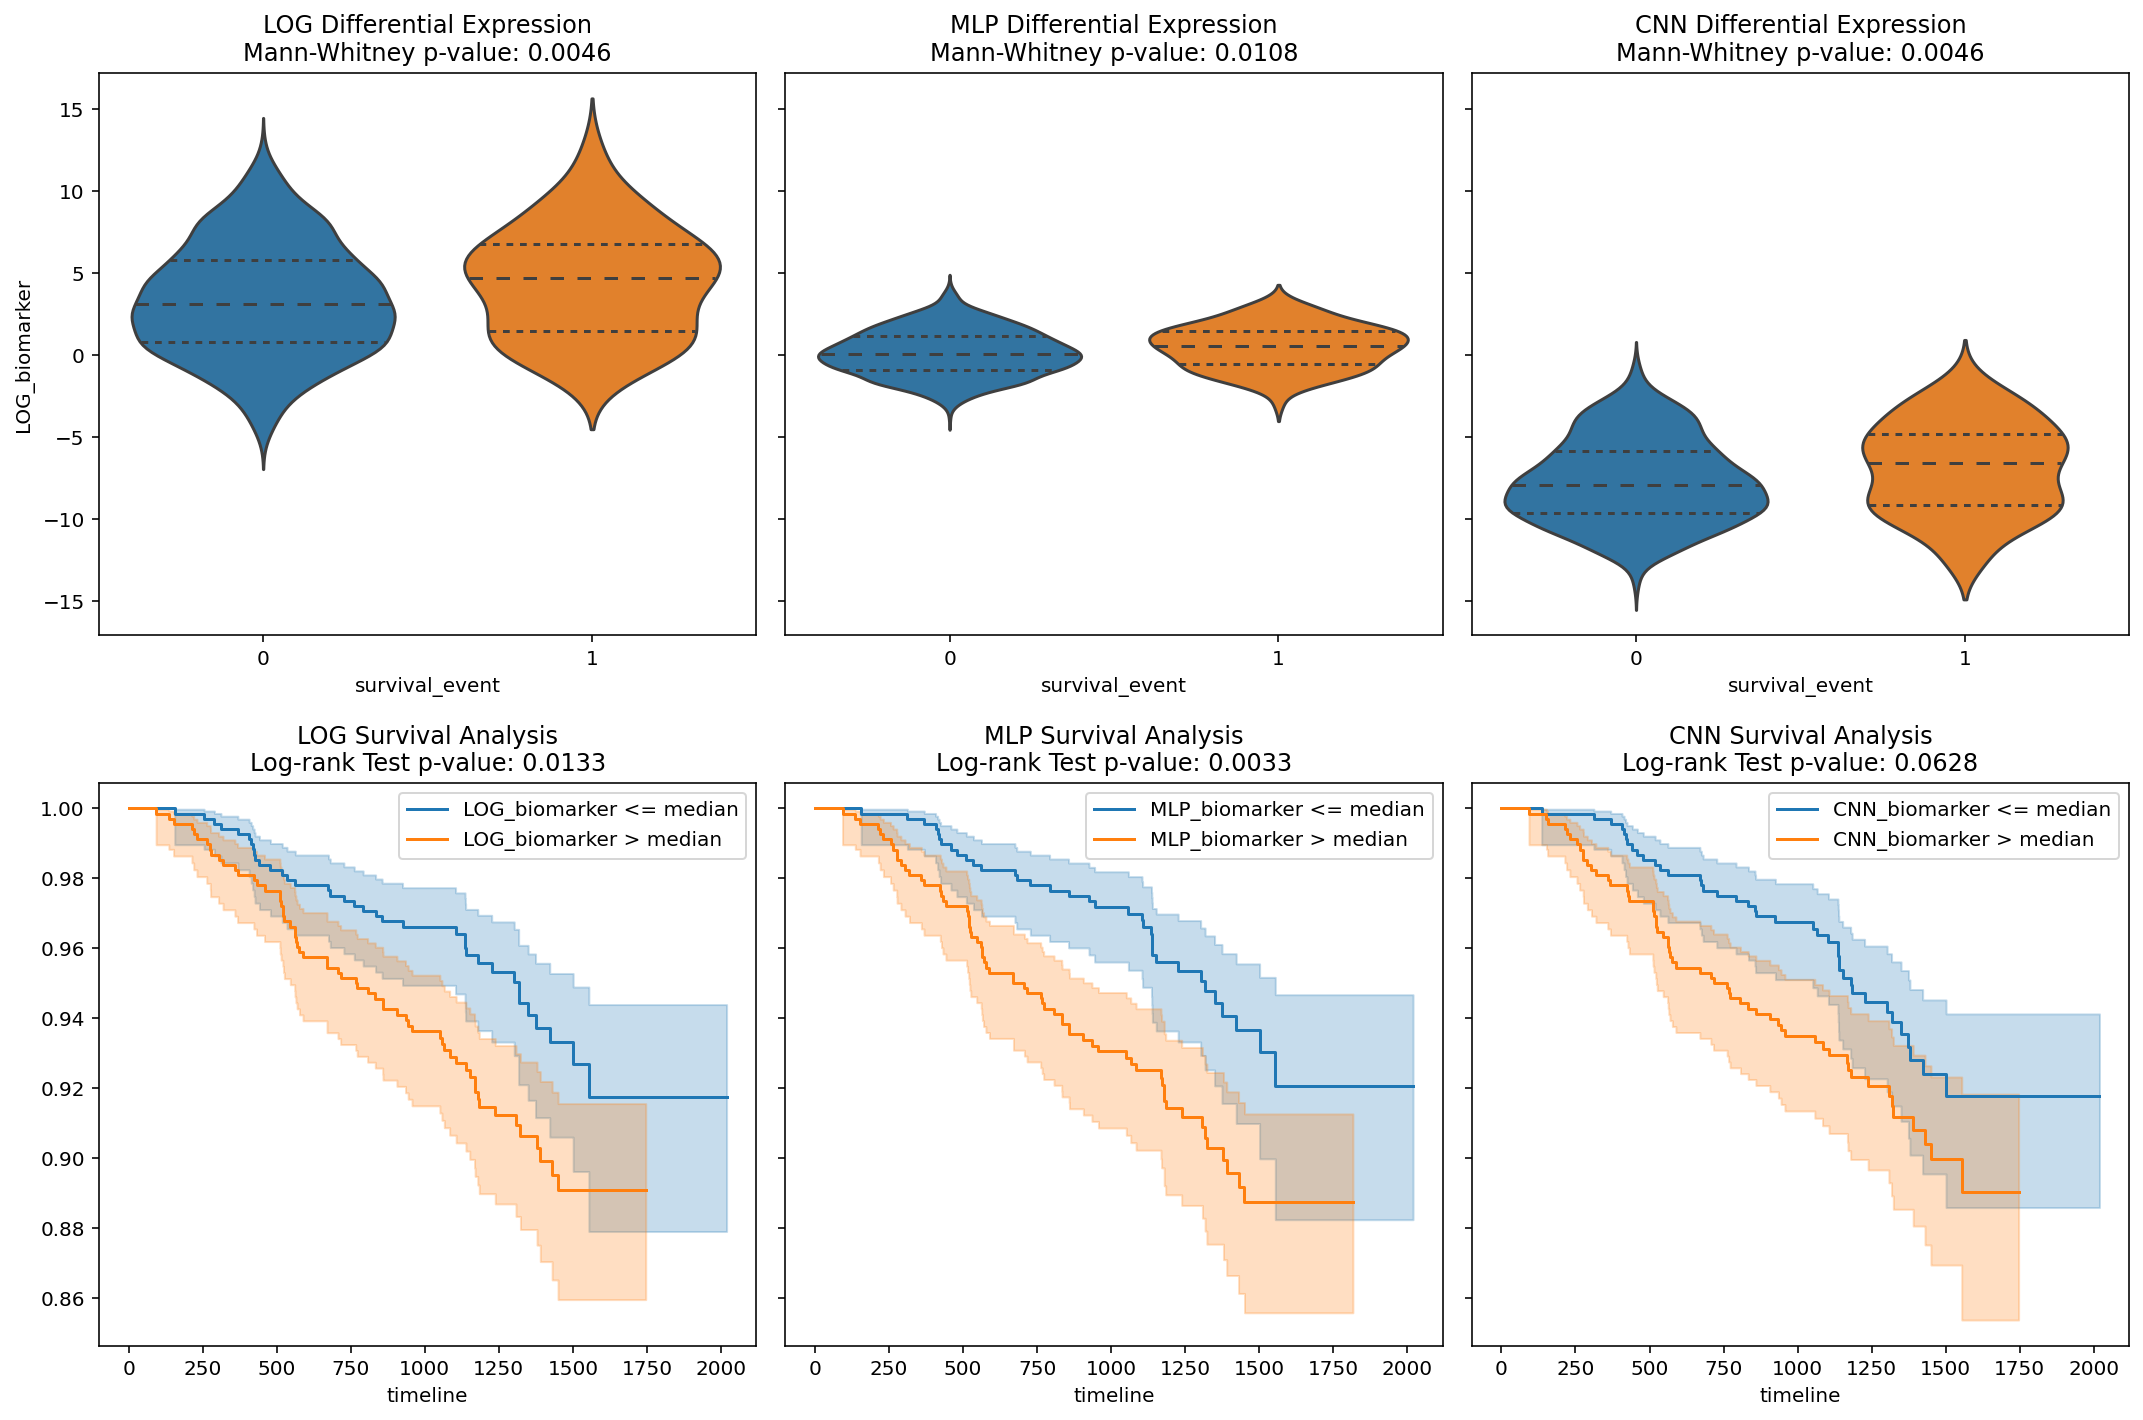

In [19]:
stab = 0.05 
# generate biomarkers for all models and plot differential expression and survival curves
mannwhitney_p_values, logrank_p_values = functions.plot_combined_analysis(
    x_full, y_full, surv_dat, [log_optimal_point, mlp_optimal_point, cnn_optimal_point], 
    [log_importances, mlp_importances, cnn_importances],['LOG', 'MLP','CNN'], stab)


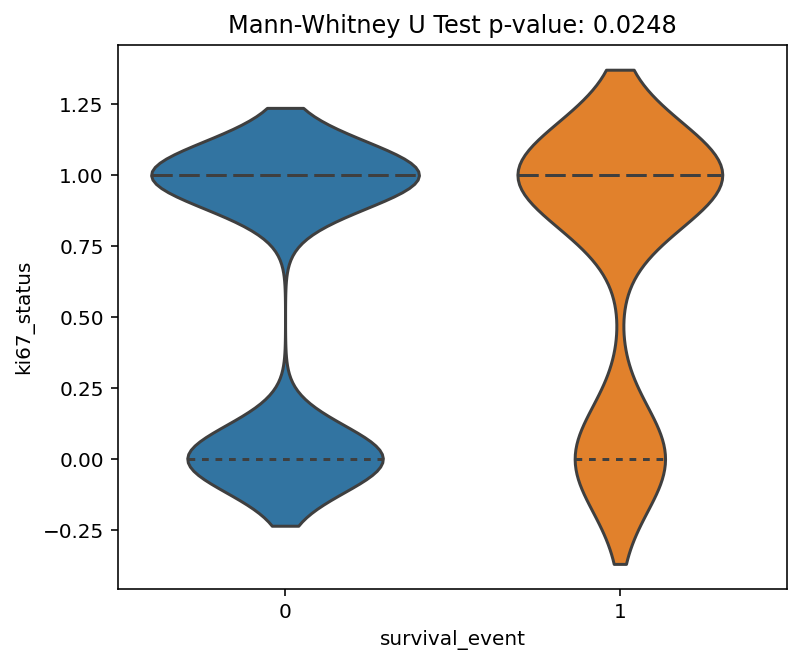

574 813


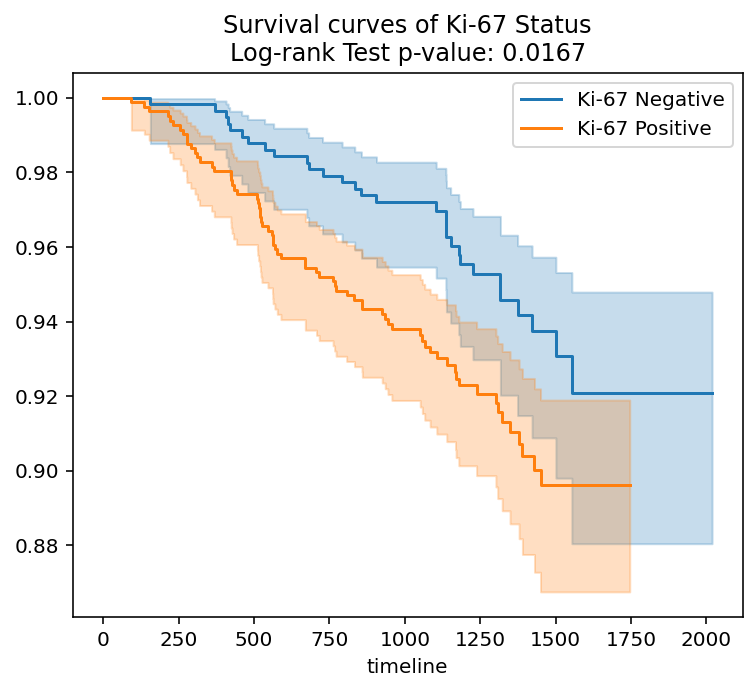

0.016718293184486026

In [20]:
# plot differential expression and survival curves for known Ki67 Biomarker
surv_dat_noNaN = surv_dat.dropna(subset=['ki67_status'])

functions.plot_single_differential_violin(surv_dat_noNaN, 'ki67_status', 'survival_event')
functions.plot_single_survival_curves(surv_dat_noNaN, 'ki67_status')